In [1]:
#Importing all necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression,Ridge, Lasso
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
import statsmodels.api as sm 
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics
from sklearn.model_selection import train_test_split

%matplotlib inline

In [2]:
sty = pd.read_csv('Energy_and_Water_Data_Disclosure_for_Local_Law_84_2017__Data_for_Calendar_Year_2016_.csv')

In [3]:
sty.head()

,Order,Property Id,Property Name,Parent Property Id,Parent Property Name,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),Address 1 (self-reported),Address 2,...,Source EUI (kBtu/ft²),Release Date,Water Required?,DOF Benchmarking Submission Status,Latitude,Longitude,Community Board,Council District,Census Tract,NTA
0,1,13286,201/205,13286,201/205,1013160001,1013160001,1037549,201/205 East 42nd st.,Not Available,...,619.4,05/01/2017 05:32:03 PM,No,In Compliance,40.750791,-73.973963,6.0,4.0,88.0,Turtle Bay-East Midtown ...
1,2,28400,NYP Columbia (West Campus),28400,NYP Columbia (West Campus),1021380040,1-02138-0040,1084198; 1084387;1084385; 1084386; 1084388; 10...,622 168th Street,Not Available,...,404.3,04/27/2017 11:23:27 AM,No,In Compliance,40.841402,-73.942568,12.0,10.0,251.0,Washington Heights South ...
2,3,4778226,MSCHoNY North,28400,NYP Columbia (West Campus),1021380030,1-02138-0030,1063380,3975 Broadway,Not Available,...,Not Available,04/27/2017 11:23:27 AM,No,In Compliance,40.840427,-73.940249,12.0,10.0,251.0,Washington Heights South ...
3,4,4778267,Herbert Irving Pavilion & Millstein Hospital,28400,NYP Columbia (West Campus),1021390001,1-02139-0001,1087281; 1076746,161 Fort Washington Ave,177 Fort Washington Ave,...,Not Available,04/27/2017 11:23:27 AM,No,In Compliance,40.840746,-73.942854,12.0,10.0,255.0,Washington Heights South ...
4,5,4778288,Neuro Institute,28400,NYP Columbia (West Campus),1021390085,1-02139-0085,1063403,710 West 168th Street,Not Available,...,Not Available,04/27/2017 11:23:27 AM,No,In Compliance,40.841559,-73.942528,12.0,10.0,255.0,Washington Heights South ...


In [4]:
sty.shape

(11746, 60)

In [5]:
sty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11746 entries, 0 to 11745
Data columns (total 60 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Order                                                       11746 non-null  int64  
 1   Property Id                                                 11746 non-null  int64  
 2   Property Name                                               11746 non-null  object 
 3   Parent Property Id                                          11746 non-null  object 
 4   Parent Property Name                                        11746 non-null  object 
 5   BBL - 10 digits                                             11735 non-null  object 
 6   NYC Borough, Block and Lot (BBL) self-reported              11746 non-null  object 
 7   NYC Building Identification Number (BIN)                    11746 non-null  object 
 

In [6]:
#Checking null value in each features
sty.isnull().sum()

Order                                                            0
Property Id                                                      0
Property Name                                                    0
Parent Property Id                                               0
Parent Property Name                                             0
BBL - 10 digits                                                 11
NYC Borough, Block and Lot (BBL) self-reported                   0
NYC Building Identification Number (BIN)                         0
Address 1 (self-reported)                                        0
Address 2                                                        0
Postal Code                                                      0
Street Number                                                  124
Street Name                                                    122
Borough                                                        118
DOF Gross Floor Area                                          

In [7]:
#Function to find NA data in given datasets
def notAvailableData(data):
    total_rows = data.shape[0]
    for columns in data:
        value=sty[columns].unique()
        null_values = sty[sty[columns]=='Not Available'][columns].count()
        if null_values > 0:
            per_null_value = float(null_values)*100/total_rows
            if per_null_value>1:
                print(f'{columns} column has {per_null_value} null values')

In [8]:
#Lets find NA data from our datasets
notAvailableData(sty)

NYC Building Identification Number (BIN) column has 1.379192916737613 null values
Address 2 column has 98.23769793972416 null values
2nd Largest Property Use Type column has 68.15085986718883 null values
2nd Largest Property Use - Gross Floor Area (ft²) column has 68.15085986718883 null values
3rd Largest Property Use Type column has 87.36591179976162 null values
3rd Largest Property Use Type - Gross Floor Area (ft²) column has 87.36591179976162 null values
Metered Areas  (Water) column has 39.238889834837394 null values
ENERGY STAR Score column has 17.912480844542824 null values
Site EUI (kBtu/ft²) column has 1.3877064532606844 null values
Weather Normalized Site EUI (kBtu/ft²) column has 12.472331006300017 null values
Weather Normalized Site Electricity Intensity (kWh/ft²) column has 6.700153243657415 null values
Weather Normalized Site Natural Gas Intensity (therms/ft²) column has 16.712072194789716 null values
Weather Normalized Source EUI (kBtu/ft²) column has 12.472331006300017 n

In [9]:
#observed that most of the record doesnt hve value ,lets convert to nan
sd=sty.replace('Not Available', np.nan)

In [10]:
def get_null_data(data):
    
    total_rows = data.shape[0]
    for columns in data.columns:
        null_values = data[columns].isnull().sum()
        if null_values > 0:
            per_null_value = float(null_values)*100/total_rows
            print(f'{columns} column has {per_null_value} null values')

In [11]:
get_null_data(sd)

BBL - 10 digits column has 0.09364890175378852 null values
NYC Borough, Block and Lot (BBL) self-reported column has 0.09364890175378852 null values
NYC Building Identification Number (BIN) column has 1.379192916737613 null values
Address 2 column has 98.23769793972416 null values
Street Number column has 1.0556785288608888 null values
Street Name column has 1.0386514558147455 null values
Borough column has 1.0045973097224588 null values
DOF Gross Floor Area column has 1.0045973097224588 null values
Largest Property Use Type column has 0.017027073046143367 null values
Largest Property Use Type - Gross Floor Area (ft²) column has 0.017027073046143367 null values
2nd Largest Property Use Type column has 68.15085986718883 null values
2nd Largest Property Use - Gross Floor Area (ft²) column has 68.15085986718883 null values
3rd Largest Property Use Type column has 87.36591179976162 null values
3rd Largest Property Use Type - Gross Floor Area (ft²) column has 87.36591179976162 null values
M

In [12]:
#droping more than 20% nan colnum
sd.drop(['Address 2','2nd Largest Property Use Type','2nd Largest Property Use - Gross Floor Area (ft²)','3rd Largest Property Use Type',
                  '3rd Largest Property Use Type - Gross Floor Area (ft²)','Metered Areas  (Water)','Fuel Oil #1 Use (kBtu)',
                  'Fuel Oil #2 Use (kBtu)','Fuel Oil #4 Use (kBtu)','Fuel Oil #5 & 6 Use (kBtu)','Diesel #2 Use (kBtu)'
                  ,'District Steam Use (kBtu)','Water Use (All Water Sources) (kgal)','Water Intensity (All Water Sources) (gal/ft²)'],axis=1,inplace=True)

In [13]:
sd.shape

(11746, 46)

In [14]:
sd['ENERGY STAR Score']=sd['ENERGY STAR Score'].replace(np.nan, 0)

In [15]:
sd['ENERGY STAR Score'].unique()

array([0, '55', '93', '1', '80', '72', '67', '100', '40', '99', '12',
       '88', '89', '86', '73', '71', '74', '19', '84', '78', '81', '6',
       '77', '3', '59', '23', '61', '58', '85', '66', '45', '2', '51',
       '17', '34', '22', '43', '13', '96', '98', '36', '69', '68', '65',
       '26', '95', '49', '39', '29', '14', '15', '16', '53', '94', '8',
       '33', '32', '91', '25', '24', '11', '21', '30', '42', '41', '79',
       '97', '35', '90', '28', '37', '31', '4', '75', '64', '9', '92',
       '62', '38', '76', '20', '54', '87', '70', '46', '56', '63', '48',
       '10', '60', '82', '44', '83', '52', '18', '7', '5', '27', '57',
       '47', '50'], dtype=object)

In [16]:
sd['ENERGY STAR Score']=sd['ENERGY STAR Score'].astype(int)

In [17]:
sd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11746 entries, 0 to 11745
Data columns (total 46 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Order                                                       11746 non-null  int64  
 1   Property Id                                                 11746 non-null  int64  
 2   Property Name                                               11746 non-null  object 
 3   Parent Property Id                                          11746 non-null  object 
 4   Parent Property Name                                        11746 non-null  object 
 5   BBL - 10 digits                                             11735 non-null  object 
 6   NYC Borough, Block and Lot (BBL) self-reported              11735 non-null  object 
 7   NYC Building Identification Number (BIN)                    11584 non-null  object 
 

In [18]:
sd.describe()

,Order,Property Id,DOF Gross Floor Area,Year Built,Number of Buildings - Self-reported,Occupancy,ENERGY STAR Score,Property GFA - Self-Reported (ft²),Latitude,Longitude,Community Board,Council District,Census Tract
count,11746.000000,1.174600e+04,1.162800e+04,11746.000000,11746.000000,11746.000000,11746.000000,1.174600e+04,9483.000000,9483.000000,9483.000000,9483.000000,9483.000000
mean,7185.759578,3.642958e+06,1.732695e+05,1948.738379,1.289971,98.762557,49.133152,1.673739e+05,40.754379,-73.957057,7.140673,15.771275,4977.596647
std,4323.859984,1.049070e+06,3.367055e+05,30.576386,4.017484,7.501603,35.570791,3.189238e+05,0.080120,0.046337,3.954129,15.674375,13520.422990
min,1.000000,7.365000e+03,5.002800e+04,1600.000000,0.000000,0.000000,0.000000,0.000000e+00,40.516065,-74.243582,1.000000,1.000000,1.000000
25%,3428.250000,2.747222e+06,6.524000e+04,1927.000000,1.000000,100.000000,10.000000,6.699400e+04,40.707226,-73.984662,4.000000,4.000000,100.000000
50%,6986.500000,3.236404e+06,9.313850e+04,1941.000000,1.000000,100.000000,55.000000,9.408000e+04,40.759130,-73.962810,7.000000,9.000000,201.000000
75%,11054.500000,4.409092e+06,1.596140e+05,1966.000000,1.000000,100.000000,81.000000,1.584140e+05,40.817623,-73.932443,9.000000,33.000000,531.500000
max,14993.000000,5.991312e+06,1.354011e+07,2019.000000,161.000000,100.000000,100.000000,1.421712e+07,40.912869,-73.715543,56.000000,51.000000,155101.000000


<Axes: >

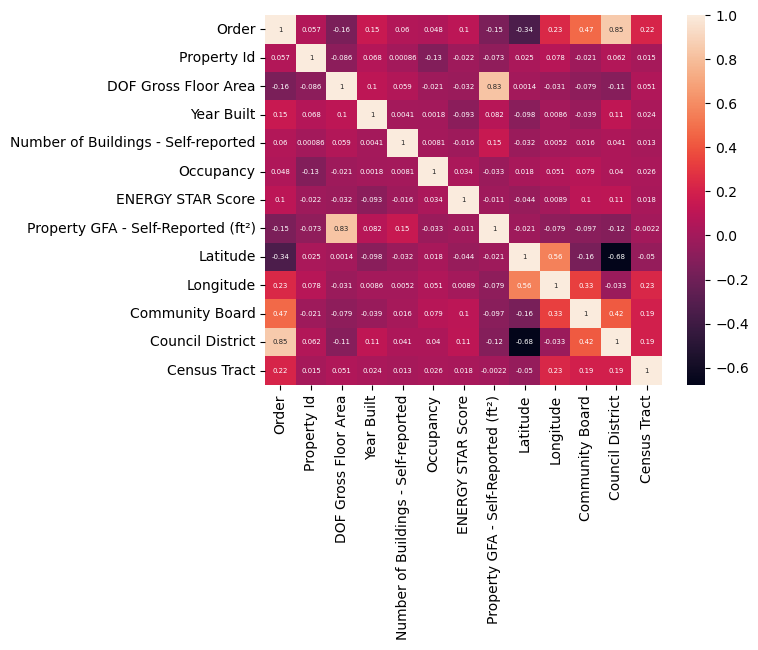

In [19]:
sns.heatmap(sd.corr(numeric_only=True),annot=True,annot_kws={'size': 5})

In [20]:
#removing id col as it is unique to each record so it doesnt give much value to target value
sd.drop(['Order','Property Id','Parent Property Id'],axis=1,inplace=True)

In [21]:
#from above heatmap we see there is mutlicollinearty btw this two cols so dropping
sd.drop(['DOF Gross Floor Area','Property GFA - Self-Reported (ft²)'],axis=1,inplace=True)

In [22]:
sd.corr(numeric_only=True)

,Year Built,Number of Buildings - Self-reported,Occupancy,ENERGY STAR Score,Latitude,Longitude,Community Board,Council District,Census Tract
Year Built,1.000000,0.004136,0.001829,-0.093286,-0.098145,0.008558,-0.039303,0.114223,0.024097
Number of Buildings - Self-reported,0.004136,1.000000,0.008121,-0.016002,-0.031596,0.005214,0.015907,0.040598,0.012541
Occupancy,0.001829,0.008121,1.000000,0.033979,0.017700,0.050592,0.079148,0.040034,0.025632
ENERGY STAR Score,-0.093286,-0.016002,0.033979,1.000000,-0.044124,0.008893,0.101856,0.105971,0.018213
Latitude,-0.098145,-0.031596,0.017700,-0.044124,1.000000,0.558010,-0.163286,-0.677742,-0.049934
Longitude,0.008558,0.005214,0.050592,0.008893,0.558010,1.000000,0.325335,-0.032852,0.229277
Community Board,-0.039303,0.015907,0.079148,0.101856,-0.163286,0.325335,1.000000,0.422470,0.188881
Council District,0.114223,0.040598,0.040034,0.105971,-0.677742,-0.032852,0.422470,1.000000,0.188012
Census Tract,0.024097,0.012541,0.025632,0.018213,-0.049934,0.229277,0.188881,0.188012,1.000000


In [23]:
sd['ENERGY STAR Score']=sd['ENERGY STAR Score'].replace(0,np.nan)

In [24]:
sd.dropna(subset=['ENERGY STAR Score'],inplace=True)

In [25]:
sd.corr(numeric_only=True)

,Year Built,Number of Buildings - Self-reported,Occupancy,ENERGY STAR Score,Latitude,Longitude,Community Board,Council District,Census Tract
Year Built,1.000000,0.015960,-0.001784,-0.118181,-0.102999,-0.004587,-0.047884,0.115386,0.010777
Number of Buildings - Self-reported,0.015960,1.000000,0.006957,-0.020564,-0.029901,0.011832,0.022868,0.036714,0.011710
Occupancy,-0.001784,0.006957,1.000000,-0.031116,0.019290,0.075369,0.087100,0.055096,0.030096
ENERGY STAR Score,-0.118181,-0.020564,-0.031116,1.000000,-0.044262,-0.029670,0.064054,0.063185,-0.001607
Latitude,-0.102999,-0.029901,0.019290,-0.044262,1.000000,0.563612,-0.209461,-0.692796,-0.043620
Longitude,-0.004587,0.011832,0.075369,-0.029670,0.563612,1.000000,0.304584,-0.045132,0.214717
Community Board,-0.047884,0.022868,0.087100,0.064054,-0.209461,0.304584,1.000000,0.456313,0.185753
Council District,0.115386,0.036714,0.055096,0.063185,-0.692796,-0.045132,0.456313,1.000000,0.187263
Census Tract,0.010777,0.011710,0.030096,-0.001607,-0.043620,0.214717,0.185753,0.187263,1.000000


<Axes: >

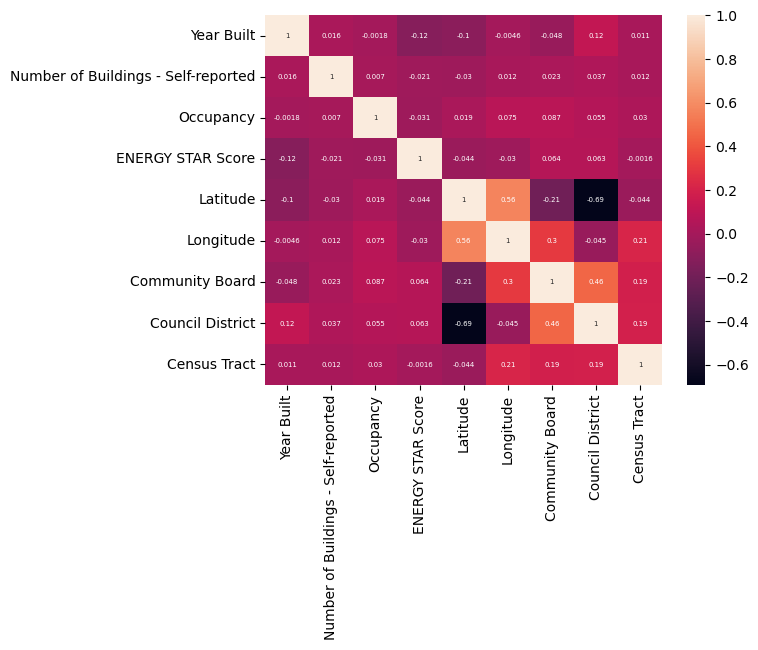

In [26]:
sns.heatmap(sd.corr(numeric_only=True),annot=True,annot_kws={'size': 5})

In [27]:
pd.pandas.set_option('display.max_columns', None)

In [28]:
sd['Largest Property Use Type'].nunique()

19

In [29]:
sd['Primary Property Type - Self Selected'].nunique()

25

In [30]:
sd['Primary Property Type - Self Selected'].unique()

array(['Hospital (General Medical & Surgical)', 'Multifamily Housing',
       'Office', 'Residence Hall/Dormitory', 'Medical Office',
       'Senior Care Community', 'Bank Branch', 'K-12 School',
       'Retail Store', 'College/University', 'Other', 'Hotel',
       'Financial Office', 'Non-Refrigerated Warehouse',
       'Worship Facility', 'Distribution Center',
       'Fitness Center/Health Club/Gym', 'Mixed Use Property',
       'Self-Storage Facility', 'Supermarket/Grocery Store', 'Courthouse',
       'Wholesale Club/Supercenter', 'Refrigerated Warehouse',
       'Manufacturing/Industrial Plant', 'Residential Care Facility'],
      dtype=object)

In [31]:
sd['Primary Property Type - Self Selected'] = sd['Primary Property Type - Self Selected'].map({'Hospital (General Medical & Surgical)': 0, 'Multifamily Housing': 1,
                                     'Office': 2, 'Residence Hall/Dormitory': 3,
                                     'Medical Office': 4, 'Senior Care Community': 5,
                                     'Bank Branch':6, 'K-12 School': 7,
                                     'Other': 8, 'Hotel': 9,
                                     'Financial Office': 10, 'Non-Refrigerated Warehouse': 11,
                                     'Worship Facility': 12, 'Distribution Center': 13,
                                     'Fitness Center/Health Club/Gym': 14, 'Mixed Use Property': 15,
                                     'Self-Storage Facility': 16, 'Supermarket/Grocery Store': 17,
                                     'Courthouse': 18, 'Wholesale Club/Supercenter': 19,
                                     'Refrigerated Warehouse': 20, 'Manufacturing/Industrial Plant': 21,
                                    'Residential Care Facility': 22,'Retail Store':23, 'College/University':24})

In [32]:
sd['Largest Property Use Type'] = sd['Largest Property Use Type'].map({'Hospital (General Medical & Surgical)': 0, 'Multifamily Housing': 1,
                                     'Office': 2, 'Residence Hall/Dormitory': 3,
                                     'Medical Office': 4, 'Senior Care Community': 5,
                                     'Bank Branch':6, 'K-12 School': 7,'Retail Store':8
                                     , 'Hotel': 9,
                                     'Financial Office': 10, 'Non-Refrigerated Warehouse': 11,
                                     'Worship Facility': 12, 'Distribution Center': 13,'Parking':14,
                                      'Supermarket/Grocery Store': 15,
                                     'Courthouse': 16, 'Wholesale Club/Supercenter': 17,
                                     'Refrigerated Warehouse': 28})

<Axes: >

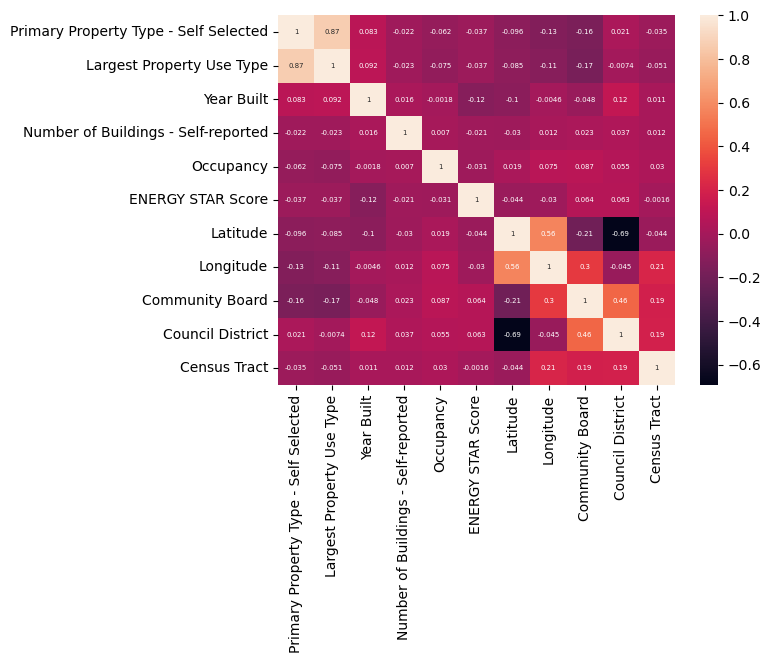

In [33]:
sns.heatmap(sd.corr(numeric_only=True),annot=True,annot_kws={'size': 5})

In [34]:
sd[['Primary Property Type - Self Selected','Largest Property Use Type']].corr()

,Primary Property Type - Self Selected,Largest Property Use Type
Primary Property Type - Self Selected,1.000000,0.866692
Largest Property Use Type,0.866692,1.000000


In [35]:
#from above heatmap we see there is mutlicollinearty btw  cols so dropping
sd.drop(['Largest Property Use Type'],axis=1,inplace=True)

In [36]:
sd['Borough'].unique()

array(['Manhattan', nan, 'Brooklyn', 'Queens', 'Bronx', 'Staten Island'],
      dtype=object)

In [37]:
#most frequently used is manthan
sd['Borough'].value_counts()

Borough
Manhattan        4057
Brooklyn         1973
Queens           1746
Bronx            1677
Staten Island     126
Name: count, dtype: int64

In [38]:
sd['Borough'].isna().sum()

63

In [39]:
#Col borugh has 5 unique dat so let encode that before lets replace na with mode value
mode_value=sd["Borough"].mode()
mode_value[0]

'Manhattan'

In [40]:
sd["Borough"].fillna(mode_value[0],inplace=True)


In [41]:
sd['Borough'].unique()

array(['Manhattan', 'Brooklyn', 'Queens', 'Bronx', 'Staten Island'],
      dtype=object)

In [42]:
sd['Borough'].isna().sum()

0

In [43]:
sd['Borough']=sd['Borough'].map({'Manhattan':1,'Brooklyn':2,'Queens':3,'Bronx':4,'Staten Island':5}).astype(int)

<Axes: >

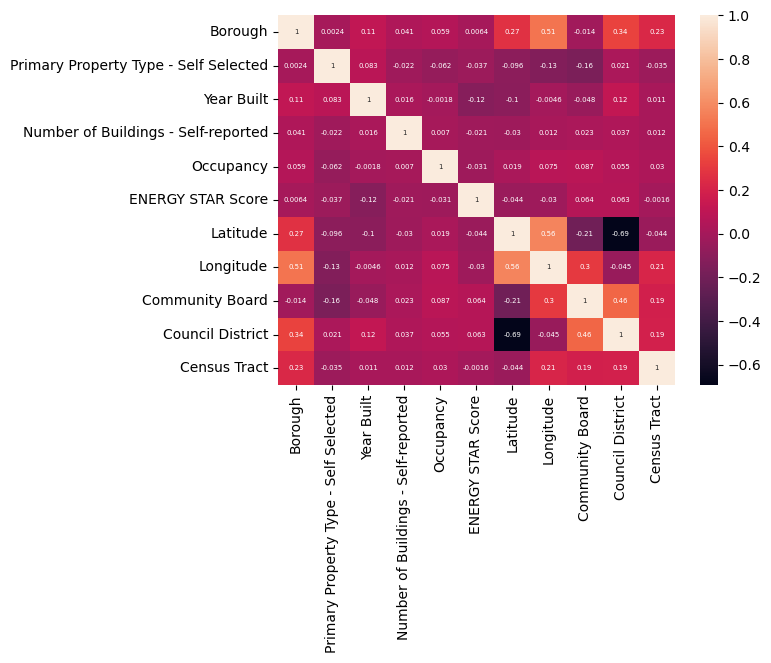

In [44]:
sns.heatmap(sd.corr(numeric_only=True),annot=True,annot_kws={'size': 5})

In [45]:
sd.shape

(9642, 40)

In [46]:
#sns.heatmap(sd.corr(numeric_only=True),annot=True,annot_kws={'size': 5})

In [47]:
sd['Metered Areas (Energy)'].unique()

array(['Whole Building', 'Another configuration', nan], dtype=object)

In [48]:
sd['Metered Areas (Energy)'].isna().sum()

4

In [49]:
#most frequently used is Whole Building
sd['Metered Areas (Energy)'].value_counts()

Metered Areas (Energy)
Whole Building           9622
Another configuration      16
Name: count, dtype: int64

In [50]:
#Col borugh has 5 unique dat so let encode that before lets replace na with mode value
mode_value=sd["Metered Areas (Energy)"].mode()
mode_value[0]

'Whole Building'

In [51]:
sd["Metered Areas (Energy)"].fillna(mode_value[0],inplace=True)
sd['Metered Areas (Energy)'].isna().sum()

0

In [52]:
sd['Metered Areas (Energy)'].unique()

array(['Whole Building', 'Another configuration'], dtype=object)

In [53]:
sd['Metered Areas (Energy)']=sd['Metered Areas (Energy)'].map({'Whole Building':0,'Another configuration':1}).astype(int)

<Axes: >

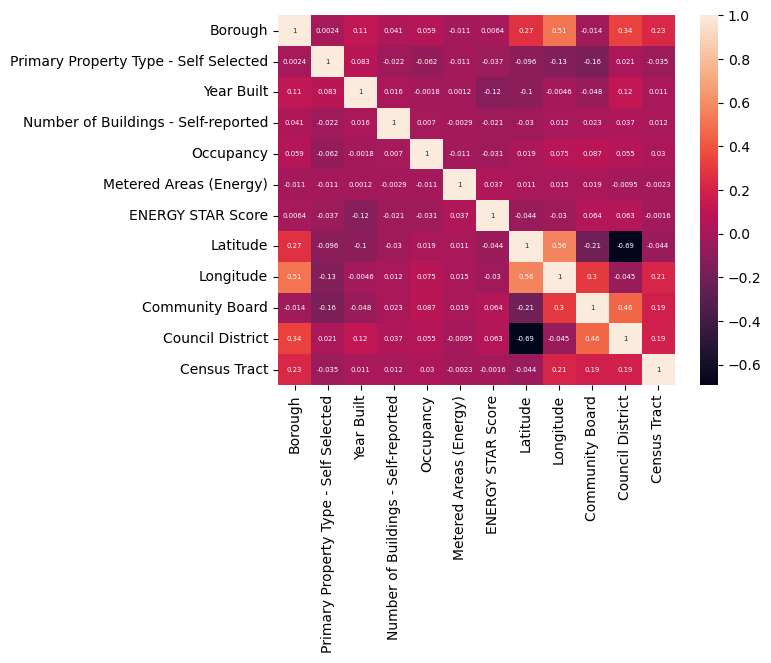

In [54]:
sns.heatmap(sd.corr(numeric_only=True),annot=True,annot_kws={'size': 5})

In [55]:
sd['DOF Benchmarking Submission Status'].unique()


array(['In Compliance', nan], dtype=object)

In [56]:
#as this DOF Benchmarking Submission Status as only 1 unique data ,so it wont get any importance to the target value so droping
sd.drop(columns='DOF Benchmarking Submission Status',inplace=True)

In [57]:

sd['Water Required?'].unique()
sd['Water Required?'].isna().sum()

81

In [58]:
mode_value=sd["Water Required?"].mode()
mode_value[0]
sd["Water Required?"].fillna(mode_value[0],inplace=True)
sd['Water Required?'].isna().sum()
sd['Water Required?']=sd['Water Required?'].map({'No':0,'Yes':1}).astype(int)

In [59]:
sd['Water Required?'].unique()

array([0, 1])

In [60]:
sd['Source EUI (kBtu/ft²)']=sd['Source EUI (kBtu/ft²)'].astype(float)

<Axes: >

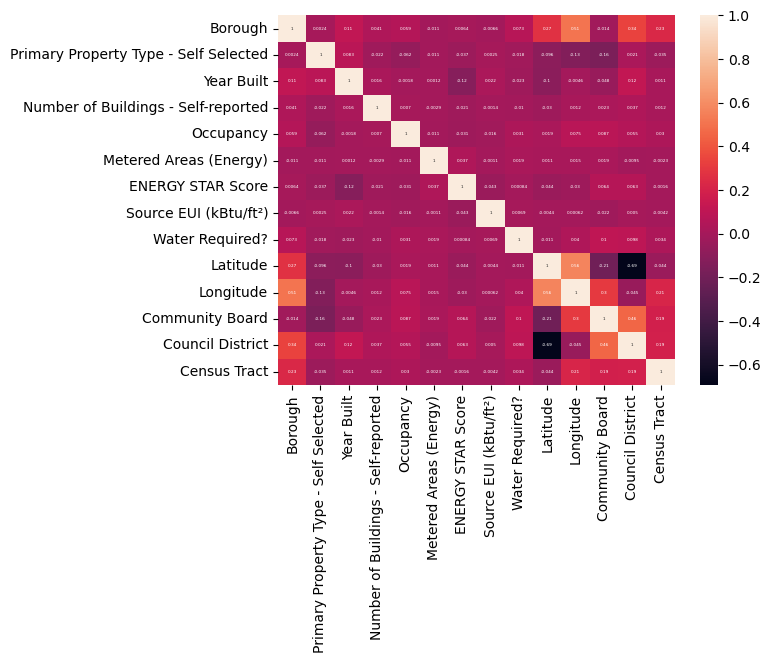

In [61]:
sns.heatmap(sd.corr(numeric_only=True),annot=True,annot_kws={'size': 3})

In [62]:
#as we seee water re? doesnt give much value to target and corr is also very less so drop
sd.drop(columns='Water Required?',inplace=True)

In [63]:
catfeat=[feat for feat in sd.columns if sd[feat].dtypes==float]
len(catfeat)

7

In [64]:
for f in catfeat:
    print("The features is {} and no of categories are {}".format(f,sd[f].nunique()))

The features is ENERGY STAR Score and no of categories are 100
The features is Source EUI (kBtu/ft²) and no of categories are 2581
The features is Latitude and no of categories are 7619
The features is Longitude and no of categories are 7500
The features is Community Board and no of categories are 19
The features is Council District and no of categories are 42
The features is Census Tract and no of categories are 776


In [65]:
sd['Largest Property Use Type - Gross Floor Area (ft²)'].isna().sum()
sd['Largest Property Use Type - Gross Floor Area (ft²)']=sd['Largest Property Use Type - Gross Floor Area (ft²)'].astype(float)

In [66]:

sd['Site EUI (kBtu/ft²)']=sd['Site EUI (kBtu/ft²)'].astype(float)

In [67]:
sd['Indirect GHG Emissions (Metric Tons CO2e)'].isna().sum()

9

In [68]:
sd['Weather Normalized Site EUI (kBtu/ft²)'].isna().sum()
sd['Weather Normalized Site Electricity Intensity (kWh/ft²)'].isna().sum()
sd['Weather Normalized Site Natural Gas Intensity (therms/ft²)'].isna().sum()
sd['Weather Normalized Source EUI (kBtu/ft²)'].isna().sum()
sd['Natural Gas Use (kBtu)'].isna().sum()
sd['Weather Normalized Site Natural Gas Use (therms)'].isna().sum()
sd['Electricity Use - Grid Purchase (kBtu)'].isna().sum()
sd['Weather Normalized Site Electricity (kWh)'].isna().sum()
sd['Total GHG Emissions (Metric Tons CO2e)'].isna().sum()
sd['Direct GHG Emissions (Metric Tons CO2e)'].isna().sum()
sd['Indirect GHG Emissions (Metric Tons CO2e)'].isna().sum()

9

<Axes: xlabel='Borough', ylabel='ENERGY STAR Score'>

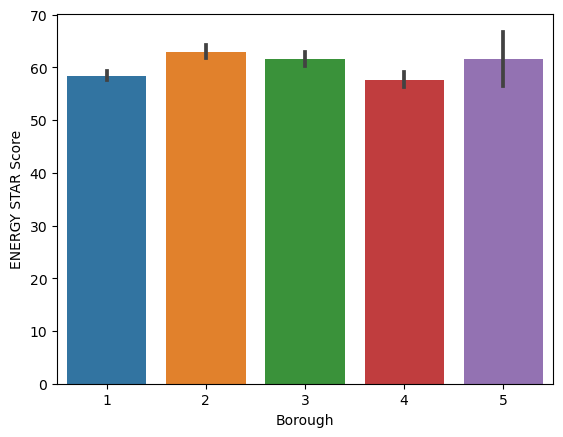

In [69]:
sns.barplot(sd, x="Borough", y="ENERGY STAR Score")

#### Each Borough as certain score of avg 55.

In [70]:
#dropping this cols as it does unique data or name for each record so it not co related to target data
sd.drop(columns=['Property Name','Parent Property Name','BBL - 10 digits','NYC Building Identification Number (BIN)','NYC Borough, Block and Lot (BBL) self-reported'],inplace=True)

In [71]:
#dropping this cols as it irrvelant data whc wont give much imp to target data
sd.drop(columns=['Address 1 (self-reported)','Postal Code','Street Number','Street Name','List of All Property Use Types at Property','NTA'],inplace=True)

In [72]:
sd.sample(4)

,Borough,Primary Property Type - Self Selected,Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings - Self-reported,Occupancy,Metered Areas (Energy),ENERGY STAR Score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Source EUI (kBtu/ft²),Natural Gas Use (kBtu),Weather Normalized Site Natural Gas Use (therms),Electricity Use - Grid Purchase (kBtu),Weather Normalized Site Electricity (kWh),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Source EUI (kBtu/ft²),Release Date,Latitude,Longitude,Community Board,Council District,Census Tract
765,1,1,1010790.0,1960,3,100,0,91.0,87.8,93.2,6.4,0.7,143.7,7.01430436E7,762807.7,23862102.2,6885034.3,5940,3725.6,2214.4,138.8,04/21/2017 10:46:19 AM,40.716662,-73.989041,3.0,1.0,1401.0
8464,2,1,77914.0,1935,1,100,0,67.0,79.4,84.6,3.1,0.7,111.1,5312239.7,57543,871723.2,244292.8,363.1,282.2,80.9,106.7,04/30/2017 11:15:10 AM,40.648223,-73.960648,14.0,40.0,51002.0
10713,3,2,37500.0,1992,1,100,0,42.0,115.3,119.6,18.1,0.6,254.7,2982100,32924,3587910.6,1032393,491.4,158.4,333,252.6,04/03/2017 02:59:53 PM,NaN,NaN,NaN,NaN,NaN
2694,1,1,96992.0,1929,1,95,0,19.0,92.8,98.3,7.1,0.1,151.6,950430.3,9504.3,2413449.6,692080.8,692.5,468.5,224,147.1,03/18/2017 12:03:44 PM,40.782074,-73.977869,7.0,6.0,165.0


In [73]:
sd['release_year']=sd['Release Date'].apply(lambda x:x.split()[0])
sd['release_year']=sd['release_year'].apply(lambda x:x.split('/')[2])
sd.head(2)

,Borough,Primary Property Type - Self Selected,Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings - Self-reported,Occupancy,Metered Areas (Energy),ENERGY STAR Score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Source EUI (kBtu/ft²),Natural Gas Use (kBtu),Weather Normalized Site Natural Gas Use (therms),Electricity Use - Grid Purchase (kBtu),Weather Normalized Site Electricity (kWh),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Source EUI (kBtu/ft²),Release Date,Latitude,Longitude,Community Board,Council District,Census Tract,release_year
1,1,0,3889181.0,1969,12,100,0,55.0,229.8,228.8,24.8,2.4,401.1,933073441,9330734.4,332365924,9.62613121E7,55870.4,51016.4,4854.1,404.3,04/27/2017 11:23:27 AM,40.841402,-73.942568,12.0,10.0,251.0,2017
5,1,0,2971874.0,1932,12,100,0,55.0,359.9,359,8.3,4.8,411.5,1.4322508769E9,1.43225088E7,86335350.5,2.45508594E7,54429.8,77564.1,-23134.3,414.2,04/27/2017 11:23:27 AM,40.761395,-73.957726,8.0,5.0,116.0,2017


In [74]:
sd['release_year']=sd['release_year'].astype(int)

In [75]:
sd.head(2)

,Borough,Primary Property Type - Self Selected,Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings - Self-reported,Occupancy,Metered Areas (Energy),ENERGY STAR Score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Source EUI (kBtu/ft²),Natural Gas Use (kBtu),Weather Normalized Site Natural Gas Use (therms),Electricity Use - Grid Purchase (kBtu),Weather Normalized Site Electricity (kWh),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Source EUI (kBtu/ft²),Release Date,Latitude,Longitude,Community Board,Council District,Census Tract,release_year
1,1,0,3889181.0,1969,12,100,0,55.0,229.8,228.8,24.8,2.4,401.1,933073441,9330734.4,332365924,9.62613121E7,55870.4,51016.4,4854.1,404.3,04/27/2017 11:23:27 AM,40.841402,-73.942568,12.0,10.0,251.0,2017
5,1,0,2971874.0,1932,12,100,0,55.0,359.9,359,8.3,4.8,411.5,1.4322508769E9,1.43225088E7,86335350.5,2.45508594E7,54429.8,77564.1,-23134.3,414.2,04/27/2017 11:23:27 AM,40.761395,-73.957726,8.0,5.0,116.0,2017


In [76]:
sd['no_of_year']=sd['release_year']-sd['Year Built']

In [77]:
sd.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9642 entries, 1 to 11745
Data columns (total 29 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Borough                                                     9642 non-null   int32  
 1   Primary Property Type - Self Selected                       9642 non-null   int64  
 2   Largest Property Use Type - Gross Floor Area (ft²)          9642 non-null   float64
 3   Year Built                                                  9642 non-null   int64  
 4   Number of Buildings - Self-reported                         9642 non-null   int64  
 5   Occupancy                                                   9642 non-null   int64  
 6   Metered Areas (Energy)                                      9642 non-null   int32  
 7   ENERGY STAR Score                                           9642 non-null   float64
 8   Si

In [78]:
sd.corr(numeric_only=True)

,Borough,Primary Property Type - Self Selected,Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings - Self-reported,Occupancy,Metered Areas (Energy),ENERGY STAR Score,Site EUI (kBtu/ft²),Source EUI (kBtu/ft²),Latitude,Longitude,Community Board,Council District,Census Tract,release_year,no_of_year
Borough,1.000000,0.002366,-0.120844,0.108788,0.040789,0.059246,-0.011306,0.006392,-0.005849,-0.006591,0.268695,0.506559,-0.014294,0.336414,0.226839,NaN,-0.108788
Primary Property Type - Self Selected,0.002366,1.000000,0.013189,0.082806,-0.021671,-0.062374,-0.011052,-0.037034,0.000424,0.002525,-0.095621,-0.131352,-0.160073,0.021495,-0.035143,NaN,-0.082806
Largest Property Use Type - Gross Floor Area (ft²),-0.120844,0.013189,1.000000,0.103934,0.087884,-0.047822,0.032479,0.017734,-0.001382,-0.000936,-0.013019,-0.089877,-0.113699,-0.131335,-0.021436,NaN,-0.103934
Year Built,0.108788,0.082806,0.103934,1.000000,0.015960,-0.001784,0.001165,-0.118181,0.021442,0.021656,-0.102999,-0.004587,-0.047884,0.115386,0.010777,NaN,-1.000000
Number of Buildings - Self-reported,0.040789,-0.021671,0.087884,0.015960,1.000000,0.006957,-0.002930,-0.020564,-0.001137,-0.001436,-0.029901,0.011832,0.022868,0.036714,0.011710,NaN,-0.015960
Occupancy,0.059246,-0.062374,-0.047822,-0.001784,0.006957,1.000000,-0.011229,-0.031116,-0.015950,-0.015688,0.019290,0.075369,0.087100,0.055096,0.030096,NaN,0.001784
Metered Areas (Energy),-0.011306,-0.011052,0.032479,0.001165,-0.002930,-0.011229,1.000000,0.037495,-0.000892,-0.001080,0.011398,0.014522,0.018506,-0.009489,-0.002279,NaN,-0.001165
ENERGY STAR Score,0.006392,-0.037034,0.017734,-0.118181,-0.020564,-0.031116,0.037495,1.000000,-0.036123,-0.042873,-0.044262,-0.029670,0.064054,0.063185,-0.001607,NaN,0.118181
Site EUI (kBtu/ft²),-0.005849,0.000424,-0.001382,0.021442,-0.001137,-0.015950,-0.000892,-0.036123,1.000000,0.996348,-0.004520,0.001441,-0.020368,0.006957,-0.004019,NaN,-0.021442
Source EUI (kBtu/ft²),-0.006591,0.002525,-0.000936,0.021656,-0.001436,-0.015688,-0.001080,-0.042873,0.996348,1.000000,-0.004354,0.000618,-0.021770,0.004978,-0.004150,NaN,-0.021656


In [79]:
sd.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9642 entries, 1 to 11745
Data columns (total 29 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Borough                                                     9642 non-null   int32  
 1   Primary Property Type - Self Selected                       9642 non-null   int64  
 2   Largest Property Use Type - Gross Floor Area (ft²)          9642 non-null   float64
 3   Year Built                                                  9642 non-null   int64  
 4   Number of Buildings - Self-reported                         9642 non-null   int64  
 5   Occupancy                                                   9642 non-null   int64  
 6   Metered Areas (Energy)                                      9642 non-null   int32  
 7   ENERGY STAR Score                                           9642 non-null   float64
 8   Si

In [80]:
sd.shape

(9642, 29)

In [81]:
sd['Weather Normalized Site EUI (kBtu/ft²)'].isna().sum()

1098

In [82]:
sd['Weather Normalized Site EUI (kBtu/ft²)']=sd['Weather Normalized Site EUI (kBtu/ft²)'].astype(float)
mean=sd['Weather Normalized Site EUI (kBtu/ft²)'].mean()
median=sd['Weather Normalized Site EUI (kBtu/ft²)'].median()
sd['Weather Normalized mean']=sd['Weather Normalized Site EUI (kBtu/ft²)'].fillna(mean)
sd['Weather Normalized median']=sd['Weather Normalized Site EUI (kBtu/ft²)'].fillna(median)
print('Weather',sd['Weather Normalized Site EUI (kBtu/ft²)'].var())
print('weather_mean',sd['Weather Normalized mean'].var())
print('weather_median',sd['Weather Normalized median'].var())

Weather 106897963.89547417
weather_mean 94723504.36251795
weather_median 94726693.75710948


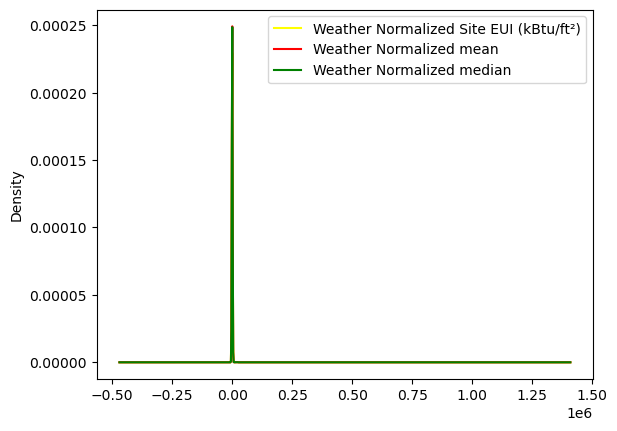

In [83]:
fig=plt.figure()
ax=fig.add_subplot(111)

sd['Weather Normalized Site EUI (kBtu/ft²)'].plot(kind='kde',ax=ax,color='yellow')
sd['Weather Normalized mean'].plot(kind='kde',ax=ax,color='red')
sd['Weather Normalized median'].plot(kind='kde',ax=ax,color='green')
lines,labels=ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

<Axes: >

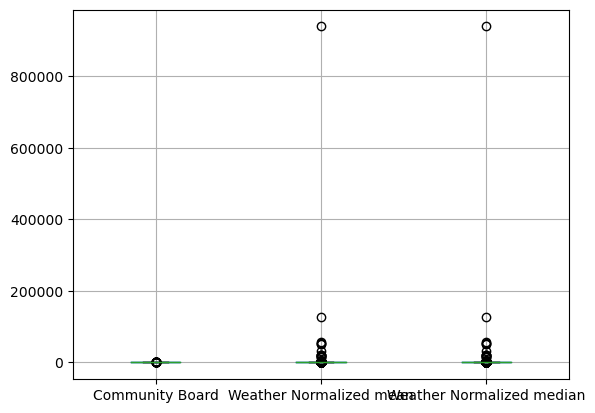

In [84]:

sd[['Community Board','Weather Normalized mean','Weather Normalized median']].boxplot()

#### as we see above after applying mean/median there is no change in boxplot and graph

In [85]:
sd['Weather Normalized Site Electricity Intensity (kWh/ft²)'].isna().sum()

492

In [86]:
sd['Census Tract']=sd['Census Tract'].astype(float)
mean=sd['Census Tract'].mean()
meadian=sd['Census Tract'].median()
mode=sd['Census Tract'].mode()
sd['Weather Natural mean']=sd['Census Tract'].fillna(mean)
sd['Weather Natural median']=sd['Census Tract'].fillna(meadian)
sd['Weather Natural mode']=sd['Census Tract'].fillna(mode[0])
print('Weather',sd['Census Tract'].var())
print('weather_mean',sd['Weather Natural mean'].var())
print('weather_median',sd['Weather Natural median'].var())
print('weather_mode',sd['Weather Natural mode'].var())

Weather 181000833.57923618
weather_mean 146193703.04755864
weather_median 149998756.8762394
weather_mode 150207579.703493


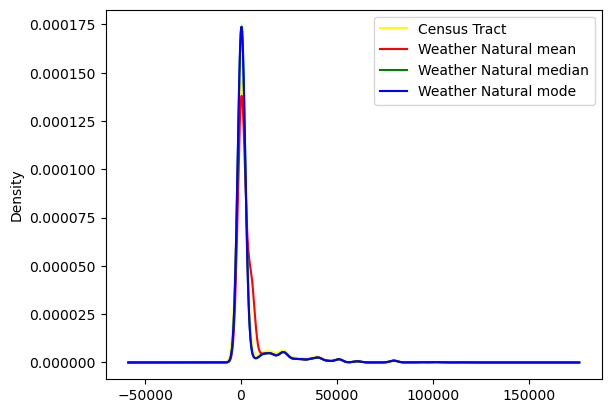

In [87]:
fig=plt.figure()
ax=fig.add_subplot(111)

sd['Census Tract'].plot(kind='kde',ax=ax,color='yellow')
sd['Weather Natural mean'].plot(kind='kde',ax=ax,color='red')
sd['Weather Natural median'].plot(kind='kde',ax=ax,color='green')
sd['Weather Natural mode'].plot(kind='kde',ax=ax,color='blue')
lines,labels=ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

<Axes: >

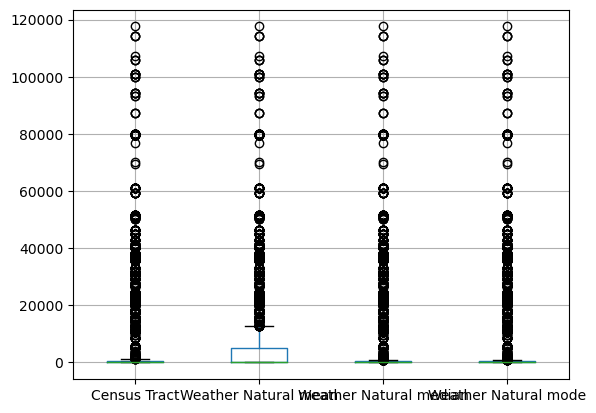

In [88]:
sd[['Census Tract','Weather Natural mean','Weather Natural median','Weather Natural mode']].boxplot()

#### as we see above after applying mean/median there is no change in boxplot and graph

In [89]:
#lets fillna with remaining features
sd['Weather Normalized Site EUI (kBtu/ft²)']=sd['Weather Normalized Site EUI (kBtu/ft²)'].astype(float)
sd['Weather Normalized Site EUI (kBtu/ft²)']=sd['Weather Normalized Site EUI (kBtu/ft²)'].fillna(sd['Weather Normalized Site EUI (kBtu/ft²)'].median())

sd['Weather Normalized Site Electricity Intensity (kWh/ft²)']=sd['Weather Normalized Site Electricity Intensity (kWh/ft²)'].astype(float)
sd['Weather Normalized Site Electricity Intensity (kWh/ft²)']=sd['Weather Normalized Site Electricity Intensity (kWh/ft²)'].fillna(sd['Weather Normalized Site Electricity Intensity (kWh/ft²)'].median())

sd['Weather Normalized Site Natural Gas Intensity (therms/ft²)']=sd['Weather Normalized Site Natural Gas Intensity (therms/ft²)'].astype(float)
sd['Weather Normalized Site Natural Gas Intensity (therms/ft²)']=sd['Weather Normalized Site Natural Gas Intensity (therms/ft²)'].fillna(sd['Weather Normalized Site Natural Gas Intensity (therms/ft²)'].median())

sd['Weather Normalized Source EUI (kBtu/ft²)']=sd['Weather Normalized Source EUI (kBtu/ft²)'].astype(float)
sd['Weather Normalized Source EUI (kBtu/ft²)']=sd['Weather Normalized Source EUI (kBtu/ft²)'].fillna(sd['Weather Normalized Source EUI (kBtu/ft²)'].median())

sd['Natural Gas Use (kBtu)']=sd['Natural Gas Use (kBtu)'].astype(float)
sd['Natural Gas Use (kBtu)']=sd['Natural Gas Use (kBtu)'].fillna(sd['Natural Gas Use (kBtu)'].median())

sd['Weather Normalized Site Natural Gas Use (therms)']=sd['Weather Normalized Site Natural Gas Use (therms)'].astype(float)
sd['Weather Normalized Site Natural Gas Use (therms)']=sd['Weather Normalized Site Natural Gas Use (therms)'].fillna(sd['Weather Normalized Site Natural Gas Use (therms)'].median())

sd['Electricity Use - Grid Purchase (kBtu)']=sd['Electricity Use - Grid Purchase (kBtu)'].astype(float)
sd['Electricity Use - Grid Purchase (kBtu)']=sd['Electricity Use - Grid Purchase (kBtu)'].fillna(sd['Electricity Use - Grid Purchase (kBtu)'].median())

sd['Weather Normalized Site Electricity (kWh)']=sd['Weather Normalized Site Electricity (kWh)'].astype(float)
sd['Weather Normalized Site Electricity (kWh)']=sd['Weather Normalized Site Electricity (kWh)'].fillna(sd['Weather Normalized Site Electricity (kWh)'].median())

sd['Total GHG Emissions (Metric Tons CO2e)']=sd['Total GHG Emissions (Metric Tons CO2e)'].astype(float)
sd['Total GHG Emissions (Metric Tons CO2e)']=sd['Total GHG Emissions (Metric Tons CO2e)'].fillna(sd['Total GHG Emissions (Metric Tons CO2e)'].median())

sd['Direct GHG Emissions (Metric Tons CO2e)']=sd['Direct GHG Emissions (Metric Tons CO2e)'].astype(float)
sd['Direct GHG Emissions (Metric Tons CO2e)']=sd['Direct GHG Emissions (Metric Tons CO2e)'].fillna(sd['Direct GHG Emissions (Metric Tons CO2e)'].median())

sd['Indirect GHG Emissions (Metric Tons CO2e)']=sd['Indirect GHG Emissions (Metric Tons CO2e)'].astype(float)
sd['Indirect GHG Emissions (Metric Tons CO2e)']=sd['Indirect GHG Emissions (Metric Tons CO2e)'].fillna(sd['Weather Normalized Site EUI (kBtu/ft²)'].median())

sd['Council District']=sd['Council District'].astype(float)
sd['Council District']=sd['Council District'].fillna(sd['Council District'].mode()[0])

sd['Census Tract']=sd['Census Tract'].astype(float)
sd['Census Tract']=sd['Census Tract'].fillna(sd['Census Tract'].mode()[0])

sd['Community Board']=sd['Community Board'].astype(float)
sd['Community Board']=sd['Community Board'].fillna(sd['Community Board'].mode()[0])

sd['Latitude']=sd['Latitude'].astype(float)
sd['Latitude']=sd['Latitude'].fillna(sd['Latitude'].median())

sd['Longitude']=sd['Longitude'].astype(float)
sd['Longitude']=sd['Longitude'].fillna(sd['Longitude'].median())

In [90]:
sd.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9642 entries, 1 to 11745
Data columns (total 34 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Borough                                                     9642 non-null   int32  
 1   Primary Property Type - Self Selected                       9642 non-null   int64  
 2   Largest Property Use Type - Gross Floor Area (ft²)          9642 non-null   float64
 3   Year Built                                                  9642 non-null   int64  
 4   Number of Buildings - Self-reported                         9642 non-null   int64  
 5   Occupancy                                                   9642 non-null   int64  
 6   Metered Areas (Energy)                                      9642 non-null   int32  
 7   ENERGY STAR Score                                           9642 non-null   float64
 8   Si

In [91]:
sd.isnull().mean()

Borough                                                       0.0
Primary Property Type - Self Selected                         0.0
Largest Property Use Type - Gross Floor Area (ft²)            0.0
Year Built                                                    0.0
Number of Buildings - Self-reported                           0.0
Occupancy                                                     0.0
Metered Areas (Energy)                                        0.0
ENERGY STAR Score                                             0.0
Site EUI (kBtu/ft²)                                           0.0
Weather Normalized Site EUI (kBtu/ft²)                        0.0
Weather Normalized Site Electricity Intensity (kWh/ft²)       0.0
Weather Normalized Site Natural Gas Intensity (therms/ft²)    0.0
Weather Normalized Source EUI (kBtu/ft²)                      0.0
Natural Gas Use (kBtu)                                        0.0
Weather Normalized Site Natural Gas Use (therms)              0.0
Electricit

In [92]:
sd.drop(columns=['Weather Natural mode','Weather Normalized mean','Weather Normalized median','Weather Natural mean','Weather Natural median'],inplace=True)

## outlier detection and handling

Borough                                                          Axes(0.125,0.814746;0.133621x0.0652542)
Primary Property Type - Self Selected                         Axes(0.285345,0.814746;0.133621x0.0652542)
Largest Property Use Type - Gross Floor Area (ft²)             Axes(0.44569,0.814746;0.133621x0.0652542)
Year Built                                                    Axes(0.606034,0.814746;0.133621x0.0652542)
Number of Buildings - Self-reported                           Axes(0.766379,0.814746;0.133621x0.0652542)
Occupancy                                                        Axes(0.125,0.736441;0.133621x0.0652542)
Metered Areas (Energy)                                        Axes(0.285345,0.736441;0.133621x0.0652542)
ENERGY STAR Score                                              Axes(0.44569,0.736441;0.133621x0.0652542)
Site EUI (kBtu/ft²)                                           Axes(0.606034,0.736441;0.133621x0.0652542)
Weather Normalized Site EUI (kBtu/ft²)                 

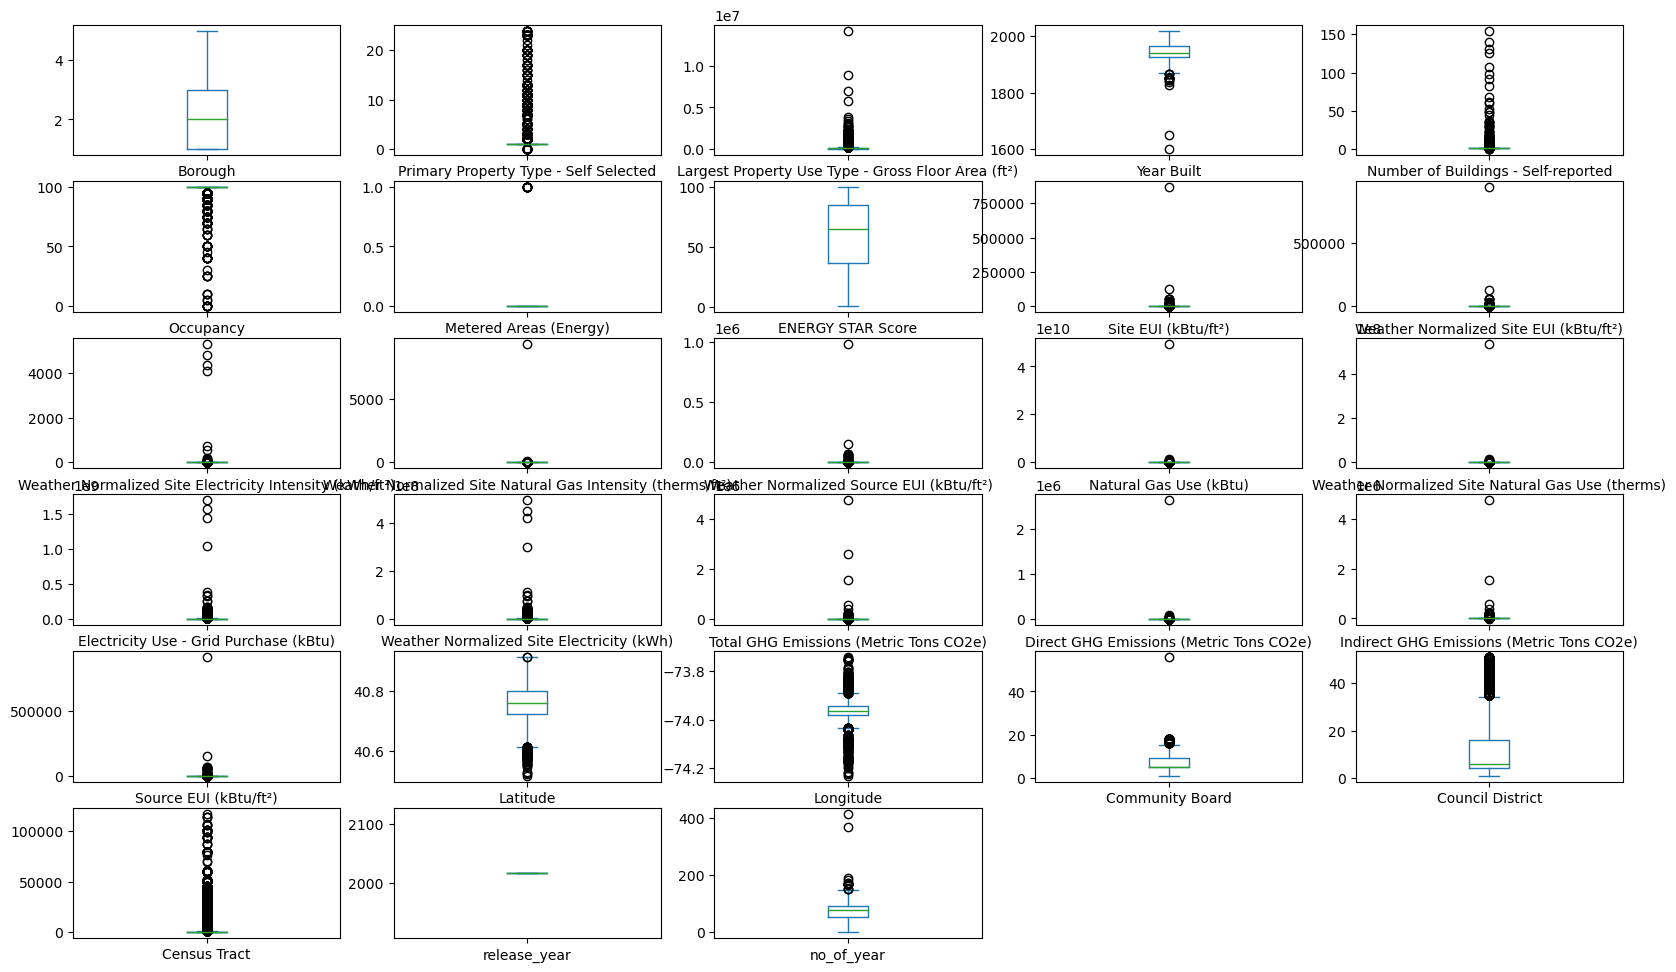

In [93]:
sd.plot(kind="box", subplots=True, layout=(10,5), figsize=(20,20))

In [94]:
sd['Largest Property Use Type - Gross Floor Area (ft²)'].describe()

count    9.642000e+03
mean     1.573911e+05
std      2.864760e+05
min      3.190000e+03
25%      6.578025e+04
50%      9.064150e+04
75%      1.501948e+05
max      1.421712e+07
Name: Largest Property Use Type - Gross Floor Area (ft²), dtype: float64

C:\Users\sathv\AppData\Local\Temp\ipykernel_9932\4290839508.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sd['Largest Property Use Type - Gross Floor Area (ft²)'])


<Axes: xlabel='Largest Property Use Type - Gross Floor Area (ft²)', ylabel='Density'>

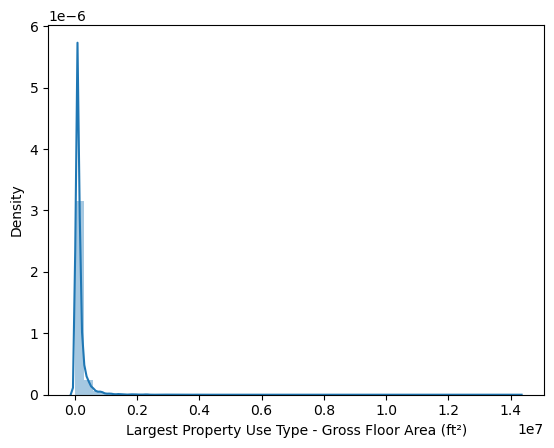

In [95]:
sns.distplot(sd['Largest Property Use Type - Gross Floor Area (ft²)'])

<Axes: xlabel='Largest Property Use Type - Gross Floor Area (ft²)'>

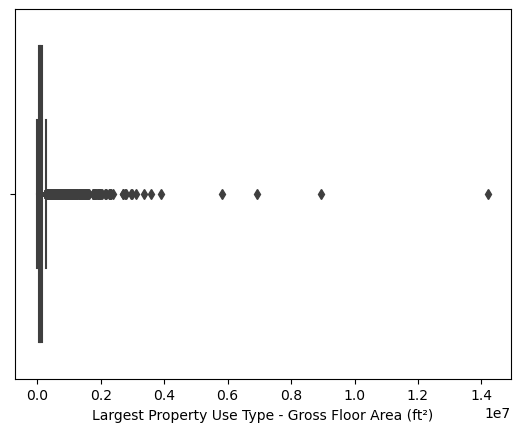

In [96]:
sns.boxplot(x=sd['Largest Property Use Type - Gross Floor Area (ft²)'])

In [97]:
IQR=sd['Largest Property Use Type - Gross Floor Area (ft²)'].quantile(0.75)-sd['Largest Property Use Type - Gross Floor Area (ft²)'].quantile(0.25)

In [98]:
sd['Largest Property Use Type - Gross Floor Area (ft²)'].skew()

20.111610234710827

In [99]:
upper_limit=sd['Largest Property Use Type - Gross Floor Area (ft²)'].quantile(0.75)+1.5*IQR
upper_limit

276816.5

In [100]:
lower_limit=sd['Largest Property Use Type - Gross Floor Area (ft²)'].quantile(0.25)-1.5*IQR
lower_limit

-60841.5

In [101]:
sd['Largest Property Use Type - Gross Floor Area (ft²)']=np.where(sd['Largest Property Use Type - Gross Floor Area (ft²)']>upper_limit,upper_limit,np.where(sd['Largest Property Use Type - Gross Floor Area (ft²)'] <lower_limit,lower_limit,sd['Largest Property Use Type - Gross Floor Area (ft²)']))

<Axes: xlabel='Largest Property Use Type - Gross Floor Area (ft²)'>

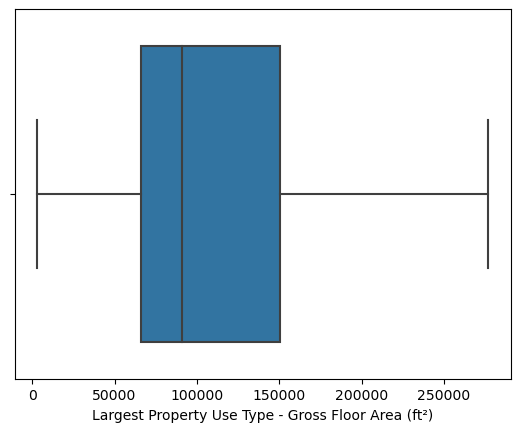

In [102]:
sns.boxplot(x=sd['Largest Property Use Type - Gross Floor Area (ft²)'])

C:\Users\sathv\AppData\Local\Temp\ipykernel_9932\4290839508.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sd['Largest Property Use Type - Gross Floor Area (ft²)'])


<Axes: xlabel='Largest Property Use Type - Gross Floor Area (ft²)', ylabel='Density'>

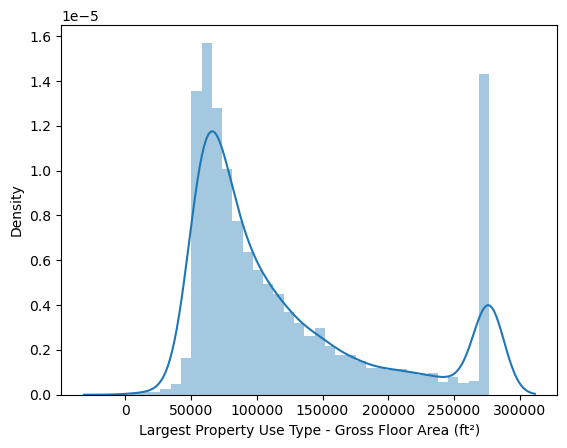

In [103]:
sns.distplot(sd['Largest Property Use Type - Gross Floor Area (ft²)'])

In [104]:
sd['Largest Property Use Type - Gross Floor Area (ft²)'].describe()

count      9642.000000
mean     120331.835159
std       72636.373561
min        3190.000000
25%       65780.250000
50%       90641.500000
75%      150194.750000
max      276816.500000
Name: Largest Property Use Type - Gross Floor Area (ft²), dtype: float64

In [105]:
sd['Largest Property Use Type - Gross Floor Area (ft²)'].skew()

1.134276282706973

In [106]:
sd['Site EUI (kBtu/ft²)'].describe()

count      9642.000000
mean        235.663711
std        9034.569471
min           0.000000
25%          62.925000
50%          78.900000
75%          97.200000
max      869265.000000
Name: Site EUI (kBtu/ft²), dtype: float64

C:\Users\sathv\AppData\Local\Temp\ipykernel_9932\1727839754.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sd['Site EUI (kBtu/ft²)'])


<Axes: xlabel='Site EUI (kBtu/ft²)', ylabel='Density'>

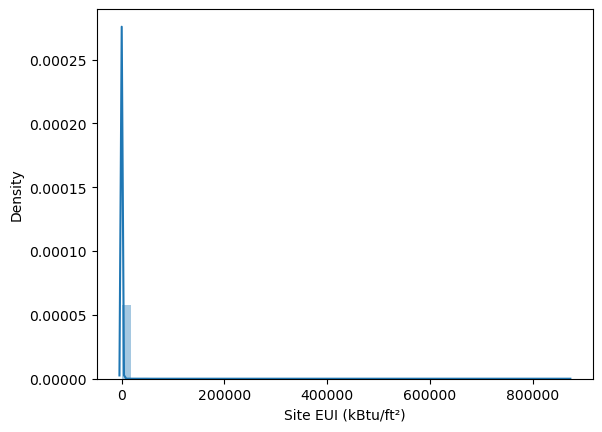

In [107]:
sns.distplot(sd['Site EUI (kBtu/ft²)'])

<Axes: xlabel='Site EUI (kBtu/ft²)'>

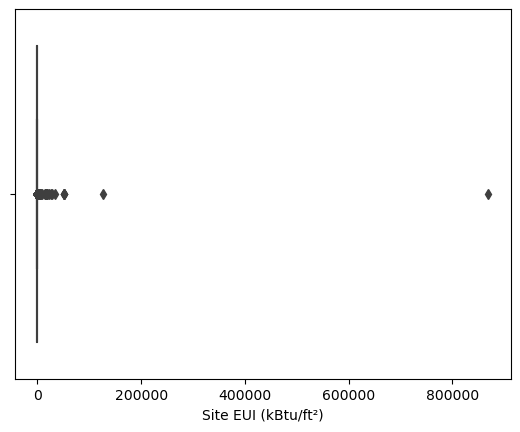

In [108]:
sns.boxplot(x=sd['Site EUI (kBtu/ft²)'])

In [109]:
sd['Site EUI (kBtu/ft²)'].skew()

92.70483406721446

In [110]:
IQR=sd['Site EUI (kBtu/ft²)'].quantile(0.75)-sd['Site EUI (kBtu/ft²)'].quantile(0.25)
upper_limit=sd['Site EUI (kBtu/ft²)'].quantile(0.75)+1.5*IQR
lower_limit=sd['Site EUI (kBtu/ft²)'].quantile(0.25)-1.5*IQR
sd['Site EUI (kBtu/ft²)']=np.where(sd['Site EUI (kBtu/ft²)']>upper_limit,upper_limit,np.where(sd['Site EUI (kBtu/ft²)'] <lower_limit,lower_limit,sd['Site EUI (kBtu/ft²)']))

<Axes: xlabel='Site EUI (kBtu/ft²)'>

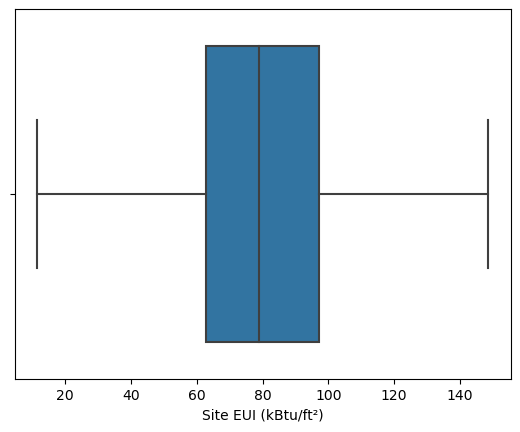

In [111]:
sns.boxplot(x=sd['Site EUI (kBtu/ft²)'])

C:\Users\sathv\AppData\Local\Temp\ipykernel_9932\1727839754.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sd['Site EUI (kBtu/ft²)'])


<Axes: xlabel='Site EUI (kBtu/ft²)', ylabel='Density'>

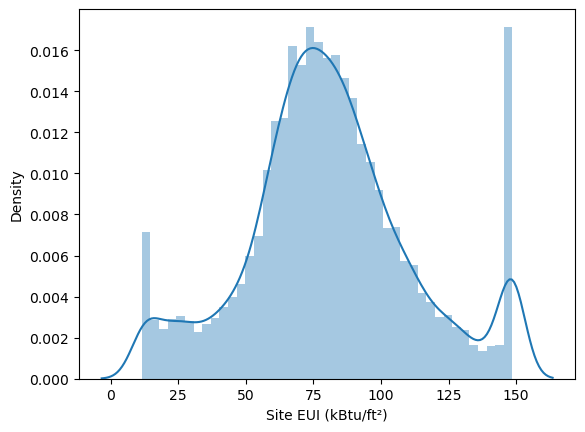

In [112]:
sns.distplot(sd['Site EUI (kBtu/ft²)'])

In [113]:
sd['Site EUI (kBtu/ft²)'].skew()

0.17517057148517634

In [114]:
sd['Weather Normalized Site EUI (kBtu/ft²)'].describe()

count      9642.000000
mean        240.429195
std        9732.763932
min           0.000000
25%          68.900000
50%          82.900000
75%          99.200000
max      939329.000000
Name: Weather Normalized Site EUI (kBtu/ft²), dtype: float64

C:\Users\sathv\AppData\Local\Temp\ipykernel_9932\970346125.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sd['Weather Normalized Site EUI (kBtu/ft²)'])


<Axes: xlabel='Weather Normalized Site EUI (kBtu/ft²)', ylabel='Density'>

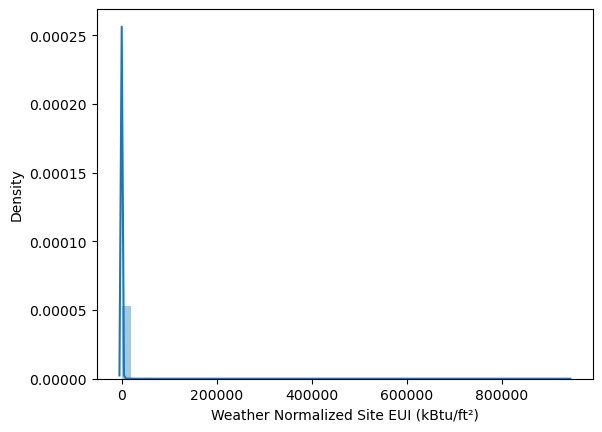

In [115]:
sns.distplot(sd['Weather Normalized Site EUI (kBtu/ft²)'])

In [116]:
sd['Weather Normalized Site EUI (kBtu/ft²)'].skew()

93.49591834426711

<Axes: xlabel='Weather Normalized Site EUI (kBtu/ft²)'>

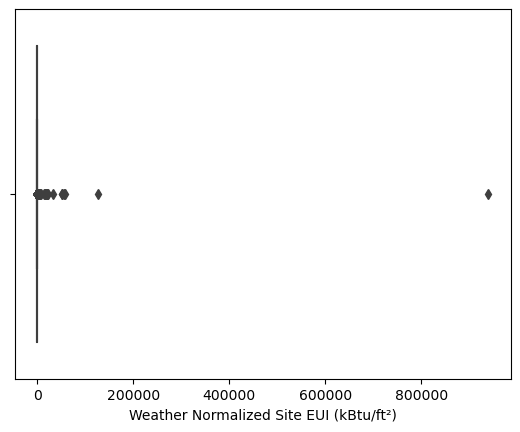

In [117]:
sns.boxplot(x=sd['Weather Normalized Site EUI (kBtu/ft²)'])

In [118]:
IQR=sd['Weather Normalized Site EUI (kBtu/ft²)'].quantile(0.75)-sd['Weather Normalized Site EUI (kBtu/ft²)'].quantile(0.25)
upper_limit=sd['Weather Normalized Site EUI (kBtu/ft²)'].quantile(0.75)+1.5*IQR
lower_limit=sd['Weather Normalized Site EUI (kBtu/ft²)'].quantile(0.25)-1.5*IQR
sd['Weather Normalized Site EUI (kBtu/ft²)']=np.where(sd['Weather Normalized Site EUI (kBtu/ft²)']>upper_limit,upper_limit,np.where(sd['Weather Normalized Site EUI (kBtu/ft²)'] <lower_limit,lower_limit,sd['Weather Normalized Site EUI (kBtu/ft²)']))

<Axes: xlabel='Weather Normalized Site EUI (kBtu/ft²)'>

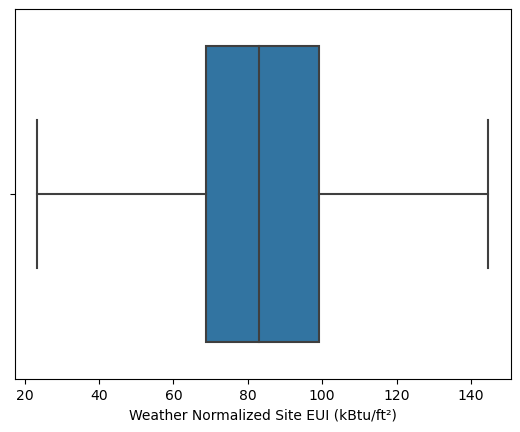

In [119]:
sns.boxplot(x=sd['Weather Normalized Site EUI (kBtu/ft²)'])

In [120]:
sd['Weather Normalized Site EUI (kBtu/ft²)'].skew()

0.10287850427306547

C:\Users\sathv\AppData\Local\Temp\ipykernel_9932\970346125.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sd['Weather Normalized Site EUI (kBtu/ft²)'])


<Axes: xlabel='Weather Normalized Site EUI (kBtu/ft²)', ylabel='Density'>

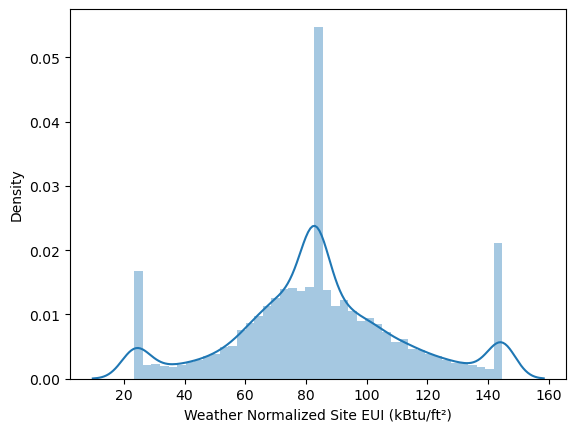

In [121]:
sns.distplot(sd['Weather Normalized Site EUI (kBtu/ft²)'])

In [122]:
sd['Weather Normalized Site EUI (kBtu/ft²)'].describe()

count    9642.000000
mean       84.153863
std        28.505428
min        23.450000
25%        68.900000
50%        82.900000
75%        99.200000
max       144.650000
Name: Weather Normalized Site EUI (kBtu/ft²), dtype: float64

In [123]:
sd['Weather Normalized Site Electricity Intensity (kWh/ft²)'].describe()

count    9642.000000
mean        9.297895
std        95.541381
min         0.000000
25%         3.800000
50%         5.100000
75%         8.400000
max      5304.400000
Name: Weather Normalized Site Electricity Intensity (kWh/ft²), dtype: float64

C:\Users\sathv\AppData\Local\Temp\ipykernel_9932\359624062.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sd['Weather Normalized Site Electricity Intensity (kWh/ft²)'])


<Axes: xlabel='Weather Normalized Site Electricity Intensity (kWh/ft²)', ylabel='Density'>

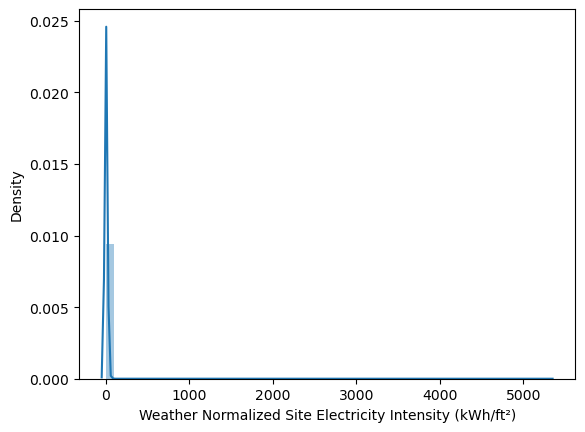

In [124]:
sns.distplot(sd['Weather Normalized Site Electricity Intensity (kWh/ft²)'])

In [125]:
sd['Weather Normalized Site Electricity Intensity (kWh/ft²)'].skew()

48.78829244472852

<Axes: xlabel='Weather Normalized Site Electricity Intensity (kWh/ft²)'>

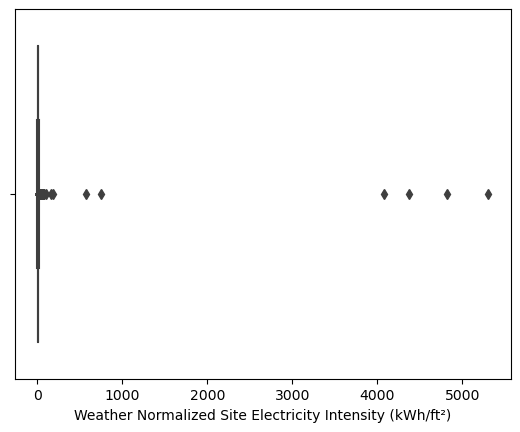

In [126]:
sns.boxplot(x=sd['Weather Normalized Site Electricity Intensity (kWh/ft²)'])

In [127]:
IQR=sd['Weather Normalized Site Electricity Intensity (kWh/ft²)'].quantile(0.75)-sd['Weather Normalized Site Electricity Intensity (kWh/ft²)'].quantile(0.25)
upper_limit=sd['Weather Normalized Site Electricity Intensity (kWh/ft²)'].quantile(0.75)+1.5*IQR
lower_limit=sd['Weather Normalized Site Electricity Intensity (kWh/ft²)'].quantile(0.25)-1.5*IQR
sd['Weather Normalized Site Electricity Intensity (kWh/ft²)']=np.where(sd['Weather Normalized Site Electricity Intensity (kWh/ft²)']>upper_limit,upper_limit,np.where(sd['Weather Normalized Site Electricity Intensity (kWh/ft²)'] <lower_limit,lower_limit,sd['Weather Normalized Site Electricity Intensity (kWh/ft²)']))

<Axes: xlabel='Weather Normalized Site Electricity Intensity (kWh/ft²)'>

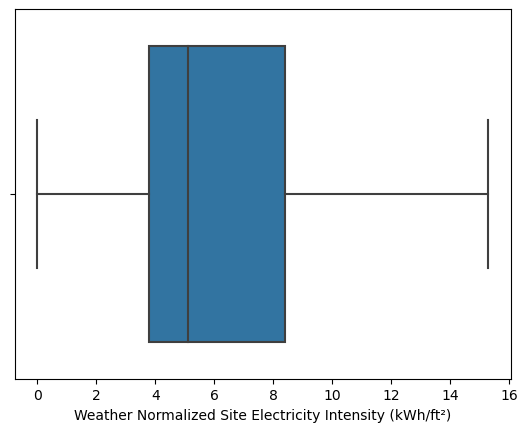

In [128]:
sns.boxplot(x=sd['Weather Normalized Site Electricity Intensity (kWh/ft²)'])

C:\Users\sathv\AppData\Local\Temp\ipykernel_9932\359624062.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sd['Weather Normalized Site Electricity Intensity (kWh/ft²)'])


<Axes: xlabel='Weather Normalized Site Electricity Intensity (kWh/ft²)', ylabel='Density'>

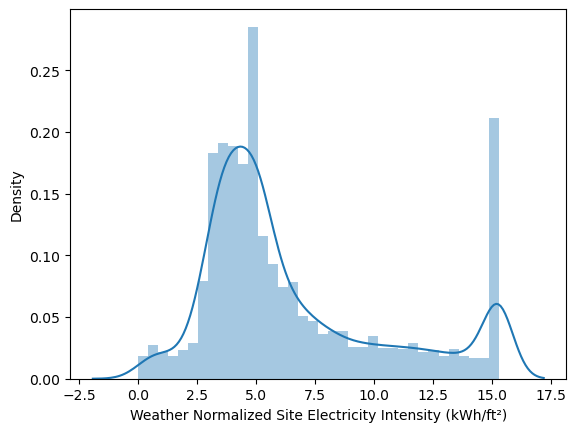

In [129]:
sns.distplot(sd['Weather Normalized Site Electricity Intensity (kWh/ft²)'])

In [130]:
sd['Weather Normalized Site EUI (kBtu/ft²)'].skew()

0.10287850427306547

In [131]:
sd['Weather Normalized Site Natural Gas Intensity (therms/ft²)'].describe()

count    9642.000000
mean        1.485750
std        95.658199
min         0.000000
25%         0.200000
50%         0.500000
75%         0.700000
max      9393.000000
Name: Weather Normalized Site Natural Gas Intensity (therms/ft²), dtype: float64

C:\Users\sathv\AppData\Local\Temp\ipykernel_9932\2310580881.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sd['Weather Normalized Site Natural Gas Intensity (therms/ft²)'])


<Axes: xlabel='Weather Normalized Site Natural Gas Intensity (therms/ft²)', ylabel='Density'>

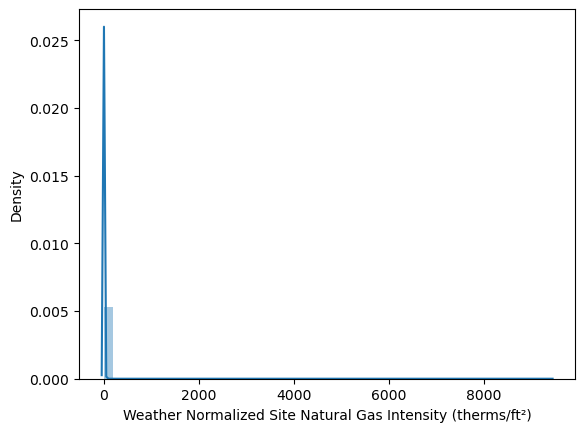

In [132]:
sns.distplot(sd['Weather Normalized Site Natural Gas Intensity (therms/ft²)'])

In [133]:
sd['Weather Normalized Site Natural Gas Intensity (therms/ft²)'].skew()

98.17673925354066

<Axes: xlabel='Weather Normalized Site Natural Gas Intensity (therms/ft²)'>

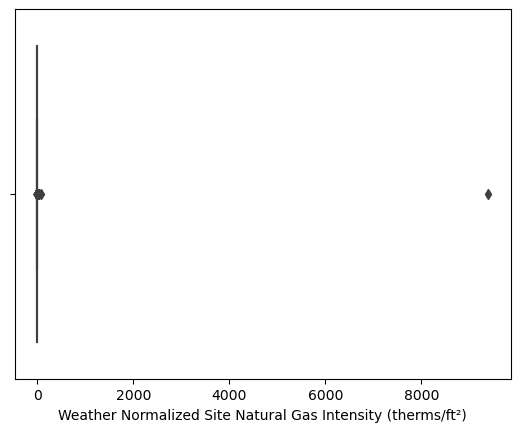

In [134]:
sns.boxplot(x=sd['Weather Normalized Site Natural Gas Intensity (therms/ft²)'])

In [135]:
IQR=sd['Weather Normalized Site Natural Gas Intensity (therms/ft²)'].quantile(0.75)-sd['Weather Normalized Site Natural Gas Intensity (therms/ft²)'].quantile(0.25)
upper_limit=sd['Weather Normalized Site Natural Gas Intensity (therms/ft²)'].quantile(0.75)+1.5*IQR
lower_limit=sd['Weather Normalized Site Natural Gas Intensity (therms/ft²)'].quantile(0.25)-1.5*IQR
sd['Weather Normalized Site Natural Gas Intensity (therms/ft²)']=np.where(sd['Weather Normalized Site Natural Gas Intensity (therms/ft²)']>upper_limit,upper_limit,np.where(sd['Weather Normalized Site Natural Gas Intensity (therms/ft²)'] <lower_limit,lower_limit,sd['Weather Normalized Site Natural Gas Intensity (therms/ft²)']))

<Axes: xlabel='Weather Normalized Site Natural Gas Intensity (therms/ft²)'>

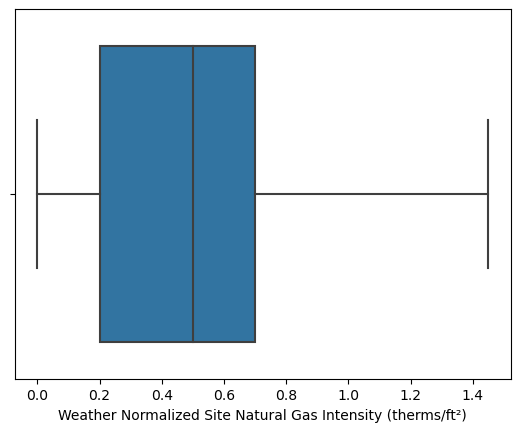

In [136]:
sns.boxplot(x=sd['Weather Normalized Site Natural Gas Intensity (therms/ft²)'])

C:\Users\sathv\AppData\Local\Temp\ipykernel_9932\2310580881.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sd['Weather Normalized Site Natural Gas Intensity (therms/ft²)'])


<Axes: xlabel='Weather Normalized Site Natural Gas Intensity (therms/ft²)', ylabel='Density'>

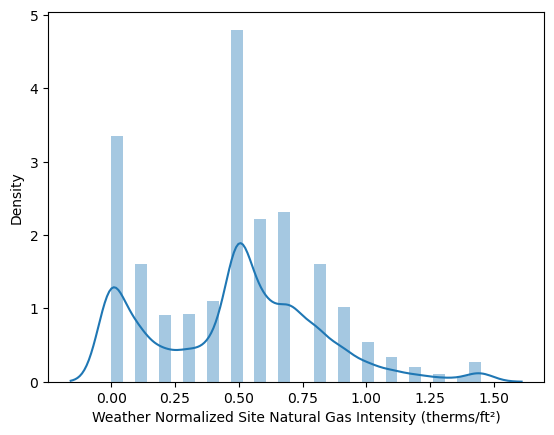

In [137]:
sns.distplot(sd['Weather Normalized Site Natural Gas Intensity (therms/ft²)'])

In [138]:
sd['Weather Normalized Site Natural Gas Intensity (therms/ft²)'].skew()

0.2825819824133793

In [139]:
sd['Weather Normalized Source EUI (kBtu/ft²)'].describe()

count      9642.000000
mean        326.127453
std       10317.503829
min           0.000000
25%         107.400000
50%         128.800000
75%         158.375000
max      986366.000000
Name: Weather Normalized Source EUI (kBtu/ft²), dtype: float64

C:\Users\sathv\AppData\Local\Temp\ipykernel_9932\4252561099.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sd['Weather Normalized Source EUI (kBtu/ft²)'])


<Axes: xlabel='Weather Normalized Source EUI (kBtu/ft²)', ylabel='Density'>

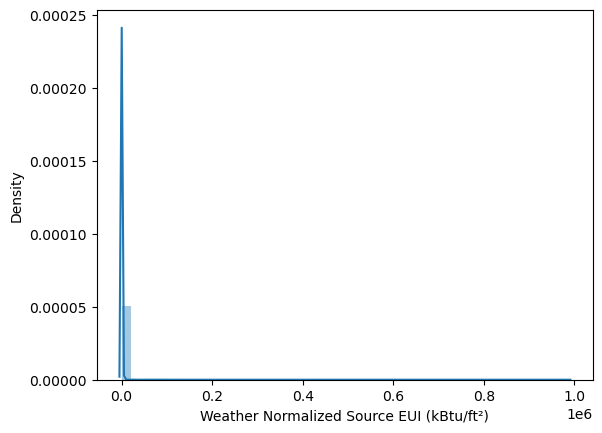

In [140]:
sns.distplot(sd['Weather Normalized Source EUI (kBtu/ft²)'])

In [141]:
sd['Weather Normalized Source EUI (kBtu/ft²)'].skew()

91.04714718211025

<Axes: xlabel='Weather Normalized Source EUI (kBtu/ft²)'>

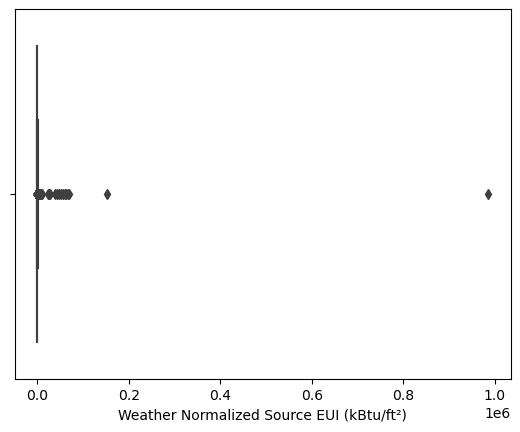

In [142]:
sns.boxplot(x=sd['Weather Normalized Source EUI (kBtu/ft²)'])

In [143]:
IQR=sd['Weather Normalized Source EUI (kBtu/ft²)'].quantile(0.75)-sd['Weather Normalized Source EUI (kBtu/ft²)'].quantile(0.25)
upper_limit=sd['Weather Normalized Source EUI (kBtu/ft²)'].quantile(0.75)+1.5*IQR
lower_limit=sd['Weather Normalized Source EUI (kBtu/ft²)'].quantile(0.25)-1.5*IQR
sd['Weather Normalized Source EUI (kBtu/ft²)']=np.where(sd['Weather Normalized Source EUI (kBtu/ft²)']>upper_limit,upper_limit,np.where(sd['Weather Normalized Source EUI (kBtu/ft²)'] <lower_limit,lower_limit,sd['Weather Normalized Source EUI (kBtu/ft²)']))

<Axes: xlabel='Weather Normalized Source EUI (kBtu/ft²)'>

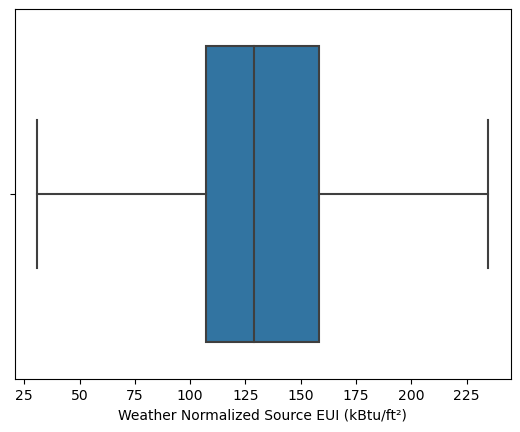

In [144]:
sns.boxplot(x=sd['Weather Normalized Source EUI (kBtu/ft²)'])

C:\Users\sathv\AppData\Local\Temp\ipykernel_9932\4252561099.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sd['Weather Normalized Source EUI (kBtu/ft²)'])


<Axes: xlabel='Weather Normalized Source EUI (kBtu/ft²)', ylabel='Density'>

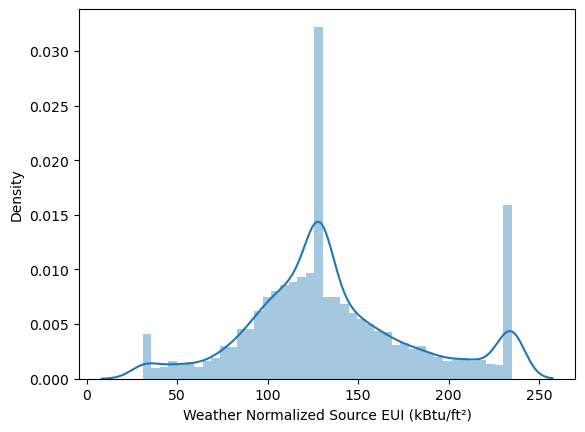

In [145]:
sns.distplot(sd['Weather Normalized Source EUI (kBtu/ft²)'])

In [146]:
sd['Weather Normalized Source EUI (kBtu/ft²)'].skew()

0.4110637872012698

In [147]:
sd['Natural Gas Use (kBtu)'].describe()

count    9.642000e+03
mean     1.178380e+07
std      5.042734e+08
min      0.000000e+00
25%      1.684542e+06
50%      4.206698e+06
75%      6.374419e+06
max      4.945919e+10
Name: Natural Gas Use (kBtu), dtype: float64

<Axes: xlabel='Natural Gas Use (kBtu)'>

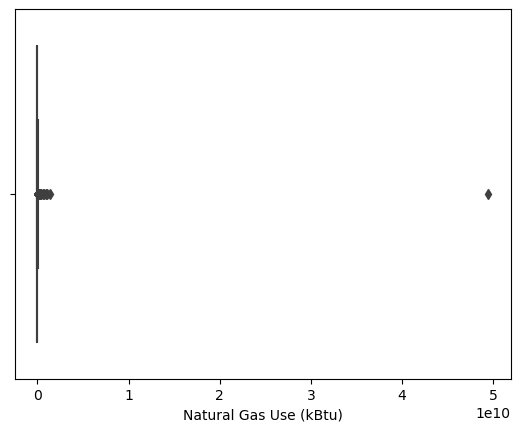

In [148]:
sns.boxplot(x=sd['Natural Gas Use (kBtu)'])

C:\Users\sathv\AppData\Local\Temp\ipykernel_9932\328582568.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sd['Natural Gas Use (kBtu)'])


<Axes: xlabel='Natural Gas Use (kBtu)', ylabel='Density'>

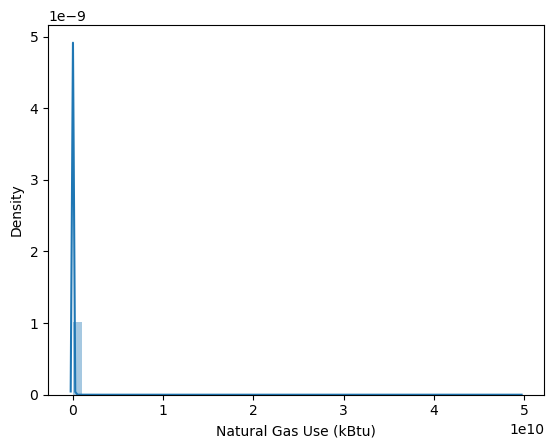

In [149]:
sns.distplot(sd['Natural Gas Use (kBtu)'])

In [150]:
sd['Natural Gas Use (kBtu)'].skew()

97.81842360751403

In [151]:
IQR=sd['Natural Gas Use (kBtu)'].quantile(0.75)-sd['Natural Gas Use (kBtu)'].quantile(0.25)
upper_limit=sd['Natural Gas Use (kBtu)'].quantile(0.75)+1.5*IQR
lower_limit=sd['Natural Gas Use (kBtu)'].quantile(0.25)-1.5*IQR
sd['Natural Gas Use (kBtu)']=np.where(sd['Natural Gas Use (kBtu)']>upper_limit,upper_limit,np.where(sd['Natural Gas Use (kBtu)'] <lower_limit,lower_limit,sd['Natural Gas Use (kBtu)']))

<Axes: xlabel='Natural Gas Use (kBtu)'>

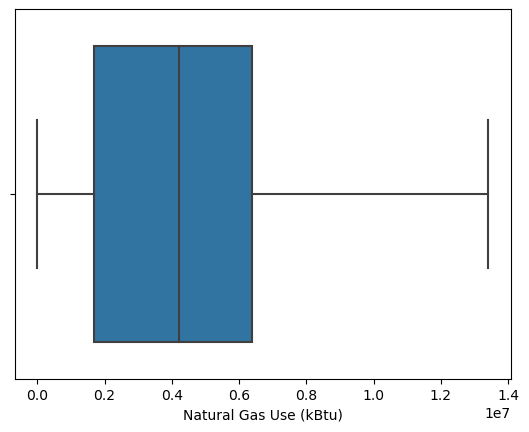

In [152]:
sns.boxplot(x=sd['Natural Gas Use (kBtu)'])

C:\Users\sathv\AppData\Local\Temp\ipykernel_9932\328582568.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sd['Natural Gas Use (kBtu)'])


<Axes: xlabel='Natural Gas Use (kBtu)', ylabel='Density'>

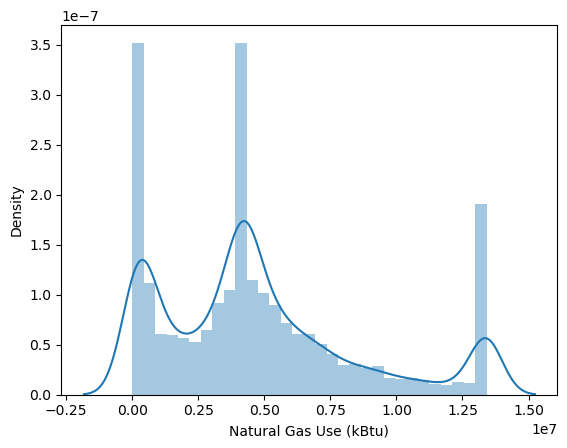

In [153]:
sns.distplot(sd['Natural Gas Use (kBtu)'])

In [154]:
sd['Natural Gas Use (kBtu)'].skew()

0.8700677635025071

In [155]:
sd['Natural Gas Use (kBtu)'].describe()

count    9.642000e+03
mean     4.757627e+06
std      3.821360e+06
min      0.000000e+00
25%      1.684542e+06
50%      4.206698e+06
75%      6.374419e+06
max      1.340923e+07
Name: Natural Gas Use (kBtu), dtype: float64

In [156]:
sd['Latitude'].describe()

count    9642.000000
mean       40.754635
std         0.074208
min        40.516725
25%        40.723941
50%        40.758752
75%        40.799067
max        40.912869
Name: Latitude, dtype: float64

In [157]:
sd['Latitude'].skew()

-0.40683747368531814

C:\Users\sathv\AppData\Local\Temp\ipykernel_9932\575864478.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sd['Latitude'])


<Axes: xlabel='Latitude', ylabel='Density'>

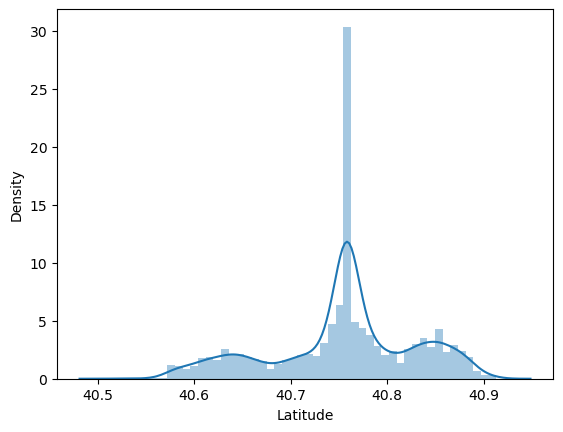

In [158]:
sns.distplot(sd['Latitude'])

<Axes: xlabel='Latitude'>

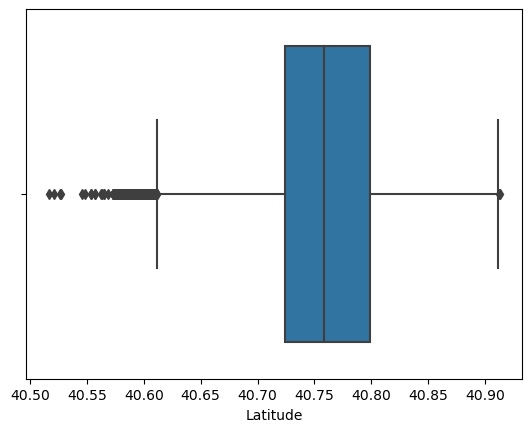

In [159]:
sns.boxplot(x=sd['Latitude'])

In [160]:
IQR=sd['Latitude'].quantile(0.75)-sd['Latitude'].quantile(0.25)
upper_limit=sd['Latitude'].quantile(0.75)+1.5*IQR
lower_limit=sd['Latitude'].quantile(0.25)-1.5*IQR
sd['Latitude']=np.where(sd['Latitude']>upper_limit,upper_limit,np.where(sd['Latitude'] <lower_limit,lower_limit,sd['Latitude']))

<Axes: xlabel='Latitude'>

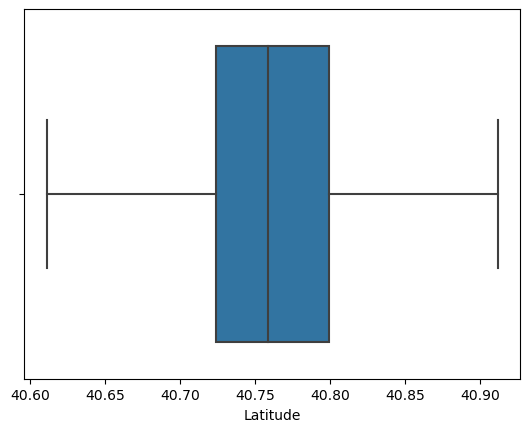

In [161]:
sns.boxplot(x=sd['Latitude'])

C:\Users\sathv\AppData\Local\Temp\ipykernel_9932\575864478.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sd['Latitude'])


<Axes: xlabel='Latitude', ylabel='Density'>

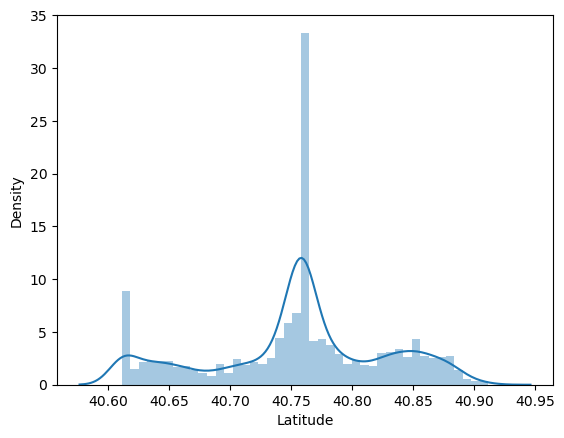

In [162]:
sns.distplot(sd['Latitude'])

In [163]:
sd['Latitude'].skew()

-0.293559760012267

In [164]:
sd['Longitude'].describe()

count    9642.000000
mean      -73.957281
std         0.041223
min       -74.229887
25%       -73.979421
50%       -73.962358
75%       -73.943550
max       -73.740543
Name: Longitude, dtype: float64

In [165]:
sd['Longitude'].skew()

0.03337331418908795

<Axes: xlabel='Longitude'>

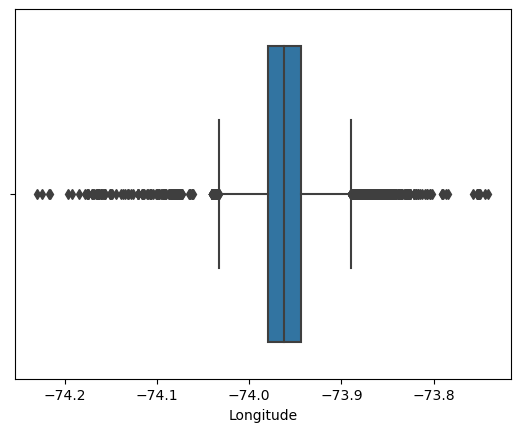

In [166]:
sns.boxplot(x=sd['Longitude'])

C:\Users\sathv\AppData\Local\Temp\ipykernel_9932\1085470943.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sd['Longitude'])


<Axes: xlabel='Longitude', ylabel='Density'>

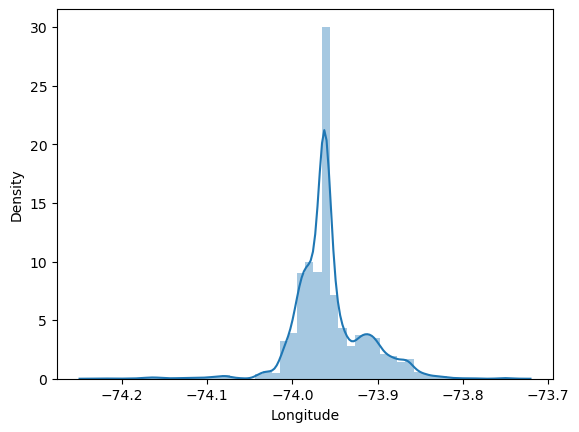

In [167]:
sns.distplot(sd['Longitude'])

In [168]:
IQR=sd['Longitude'].quantile(0.75)-sd['Longitude'].quantile(0.25)
upper_limit=sd['Longitude'].quantile(0.75)+1.5*IQR
lower_limit=sd['Longitude'].quantile(0.25)-1.5*IQR
sd['Longitude']=np.where(sd['Longitude']>upper_limit,upper_limit,np.where(sd['Longitude'] <lower_limit,lower_limit,sd['Longitude']))

C:\Users\sathv\AppData\Local\Temp\ipykernel_9932\1085470943.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sd['Longitude'])


<Axes: xlabel='Longitude', ylabel='Density'>

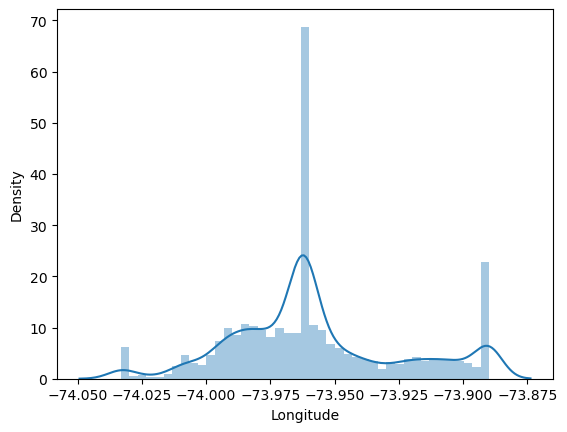

In [169]:
sns.distplot(sd['Longitude'])

<Axes: xlabel='Longitude'>

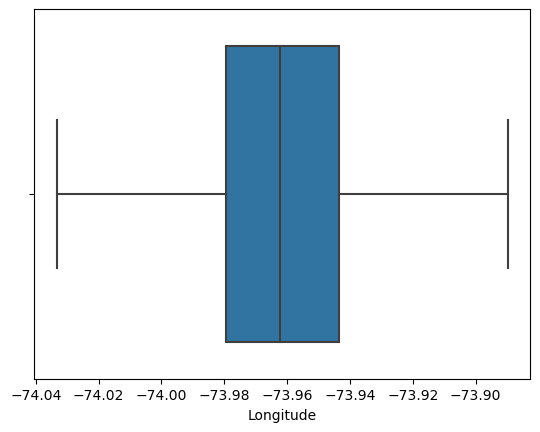

In [170]:
sns.boxplot(x=sd['Longitude'])

In [171]:
sd['Longitude'].skew()

0.43574300824441836

<Axes: xlabel='Longitude'>

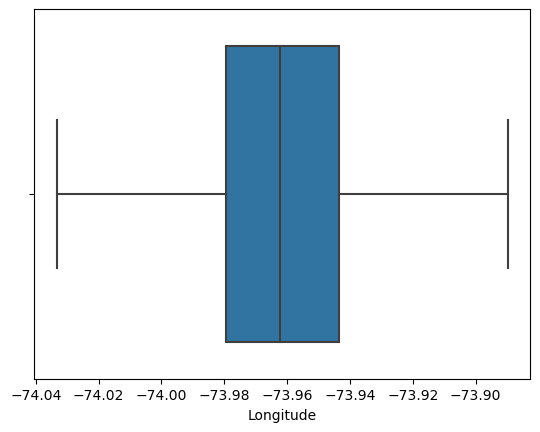

In [172]:
sns.boxplot(x=sd['Longitude'])

C:\Users\sathv\AppData\Local\Temp\ipykernel_9932\1085470943.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sd['Longitude'])


<Axes: xlabel='Longitude', ylabel='Density'>

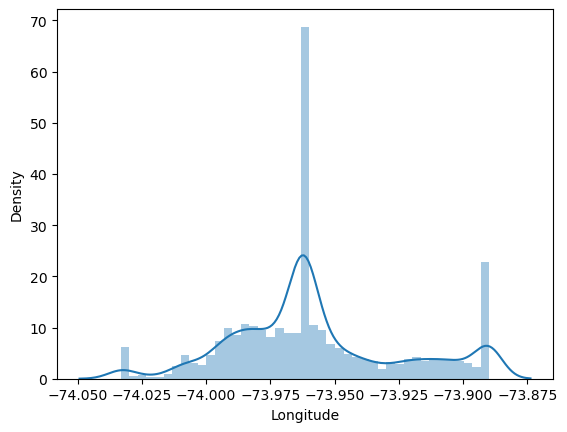

In [173]:
sns.distplot(sd['Longitude'])

In [174]:
sd['Longitude'].skew()

0.43574300824441836

In [175]:
IQR=sd['Weather Normalized Site Natural Gas Use (therms)'].quantile(0.75)-sd['Weather Normalized Site Natural Gas Use (therms)'].quantile(0.25)
upper_limit=sd['Weather Normalized Site Natural Gas Use (therms)'].quantile(0.75)+1.5*IQR
lower_limit=sd['Weather Normalized Site Natural Gas Use (therms)'].quantile(0.25)-1.5*IQR
sd['Weather Normalized Site Natural Gas Use (therms)']=np.where(sd['Weather Normalized Site Natural Gas Use (therms)']>upper_limit,upper_limit,np.where(sd['Weather Normalized Site Natural Gas Use (therms)'] <lower_limit,lower_limit,sd['Weather Normalized Site Natural Gas Use (therms)']))

In [176]:
IQR=sd['Electricity Use - Grid Purchase (kBtu)'].quantile(0.75)-sd['Electricity Use - Grid Purchase (kBtu)'].quantile(0.25)
upper_limit=sd['Electricity Use - Grid Purchase (kBtu)'].quantile(0.75)+1.5*IQR
lower_limit=sd['Electricity Use - Grid Purchase (kBtu)'].quantile(0.25)-1.5*IQR
sd['Electricity Use - Grid Purchase (kBtu)']=np.where(sd['Electricity Use - Grid Purchase (kBtu)']>upper_limit,upper_limit,np.where(sd['Electricity Use - Grid Purchase (kBtu)'] <lower_limit,lower_limit,sd['Electricity Use - Grid Purchase (kBtu)']))

In [177]:
IQR=sd['Weather Normalized Site Electricity (kWh)'].quantile(0.75)-sd['Weather Normalized Site Electricity (kWh)'].quantile(0.25)
upper_limit=sd['Weather Normalized Site Electricity (kWh)'].quantile(0.75)+1.5*IQR
lower_limit=sd['Weather Normalized Site Electricity (kWh)'].quantile(0.25)-1.5*IQR
sd['Weather Normalized Site Electricity (kWh)']=np.where(sd['Weather Normalized Site Electricity (kWh)']>upper_limit,upper_limit,np.where(sd['Weather Normalized Site Electricity (kWh)'] <lower_limit,lower_limit,sd['Weather Normalized Site Electricity (kWh)']))

In [178]:
IQR=sd['Total GHG Emissions (Metric Tons CO2e)'].quantile(0.75)-sd['Total GHG Emissions (Metric Tons CO2e)'].quantile(0.25)
upper_limit=sd['Total GHG Emissions (Metric Tons CO2e)'].quantile(0.75)+1.5*IQR
lower_limit=sd['Total GHG Emissions (Metric Tons CO2e)'].quantile(0.25)-1.5*IQR
sd['Total GHG Emissions (Metric Tons CO2e)']=np.where(sd['Total GHG Emissions (Metric Tons CO2e)']>upper_limit,upper_limit,np.where(sd['Total GHG Emissions (Metric Tons CO2e)'] <lower_limit,lower_limit,sd['Total GHG Emissions (Metric Tons CO2e)']))

In [179]:
IQR=sd['Direct GHG Emissions (Metric Tons CO2e)'].quantile(0.75)-sd['Direct GHG Emissions (Metric Tons CO2e)'].quantile(0.25)
upper_limit=sd['Direct GHG Emissions (Metric Tons CO2e)'].quantile(0.75)+1.5*IQR
lower_limit=sd['Direct GHG Emissions (Metric Tons CO2e)'].quantile(0.25)-1.5*IQR
sd['Direct GHG Emissions (Metric Tons CO2e)']=np.where(sd['Direct GHG Emissions (Metric Tons CO2e)']>upper_limit,upper_limit,np.where(sd['Direct GHG Emissions (Metric Tons CO2e)'] <lower_limit,lower_limit,sd['Direct GHG Emissions (Metric Tons CO2e)']))

In [180]:
IQR=sd['Indirect GHG Emissions (Metric Tons CO2e)'].quantile(0.75)-sd['Indirect GHG Emissions (Metric Tons CO2e)'].quantile(0.25)
upper_limit=sd['Indirect GHG Emissions (Metric Tons CO2e)'].quantile(0.75)+1.5*IQR
lower_limit=sd['Indirect GHG Emissions (Metric Tons CO2e)'].quantile(0.25)-1.5*IQR
sd['Indirect GHG Emissions (Metric Tons CO2e)']=np.where(sd['Indirect GHG Emissions (Metric Tons CO2e)']>upper_limit,upper_limit,np.where(sd['Indirect GHG Emissions (Metric Tons CO2e)'] <lower_limit,lower_limit,sd['Indirect GHG Emissions (Metric Tons CO2e)']))

In [181]:
IQR=sd['Source EUI (kBtu/ft²)'].quantile(0.75)-sd['Source EUI (kBtu/ft²)'].quantile(0.25)
upper_limit=sd['Source EUI (kBtu/ft²)'].quantile(0.75)+1.5*IQR
lower_limit=sd['Source EUI (kBtu/ft²)'].quantile(0.25)-1.5*IQR
sd['Source EUI (kBtu/ft²)']=np.where(sd['Source EUI (kBtu/ft²)']>upper_limit,upper_limit,np.where(sd['Source EUI (kBtu/ft²)'] <lower_limit,lower_limit,sd['Source EUI (kBtu/ft²)']))

Borough                                                          Axes(0.125,0.814746;0.133621x0.0652542)
Primary Property Type - Self Selected                         Axes(0.285345,0.814746;0.133621x0.0652542)
Largest Property Use Type - Gross Floor Area (ft²)             Axes(0.44569,0.814746;0.133621x0.0652542)
Year Built                                                    Axes(0.606034,0.814746;0.133621x0.0652542)
Number of Buildings - Self-reported                           Axes(0.766379,0.814746;0.133621x0.0652542)
Occupancy                                                        Axes(0.125,0.736441;0.133621x0.0652542)
Metered Areas (Energy)                                        Axes(0.285345,0.736441;0.133621x0.0652542)
ENERGY STAR Score                                              Axes(0.44569,0.736441;0.133621x0.0652542)
Site EUI (kBtu/ft²)                                           Axes(0.606034,0.736441;0.133621x0.0652542)
Weather Normalized Site EUI (kBtu/ft²)                 

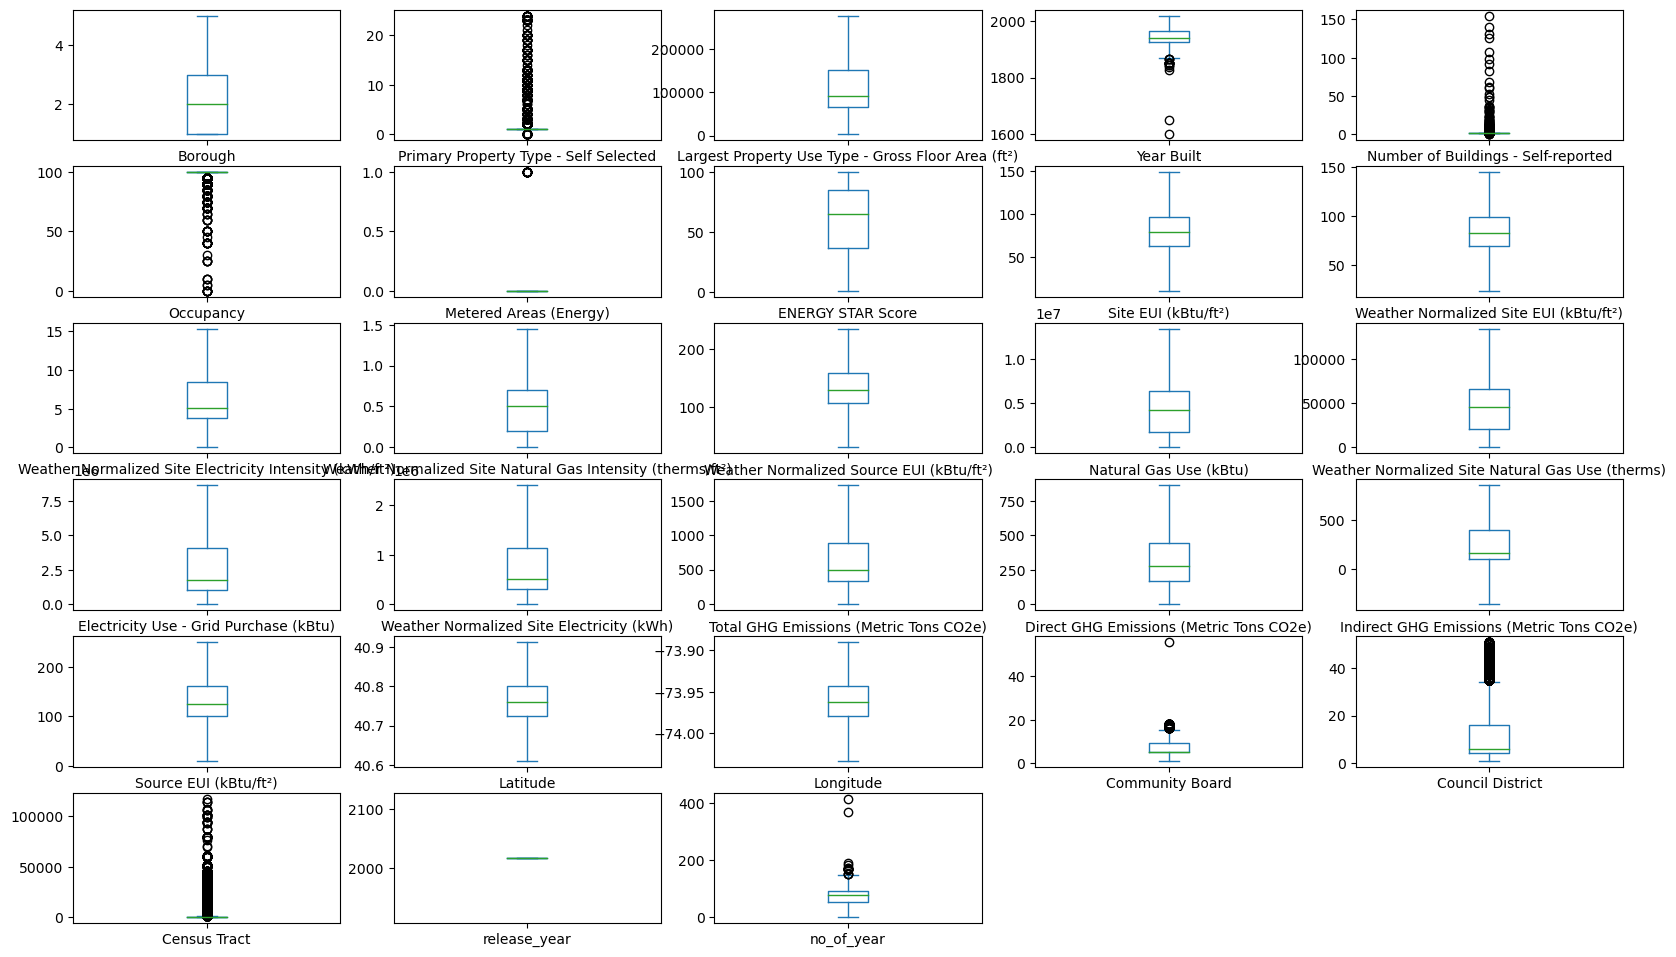

In [182]:
sd.plot(kind="box", subplots=True, layout=(10,5), figsize=(20,20))

In [183]:
sd.drop(columns='Release Date').corr()

,Borough,Primary Property Type - Self Selected,Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings - Self-reported,Occupancy,Metered Areas (Energy),ENERGY STAR Score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Source EUI (kBtu/ft²),Natural Gas Use (kBtu),Weather Normalized Site Natural Gas Use (therms),Electricity Use - Grid Purchase (kBtu),Weather Normalized Site Electricity (kWh),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Source EUI (kBtu/ft²),Latitude,Longitude,Community Board,Council District,Census Tract,release_year,no_of_year
Borough,1.000000,0.002366,-0.213587,0.108788,0.040789,0.059246,-0.011306,0.006392,0.023505,0.036589,-0.305099,0.203648,-0.155146,0.085833,0.087987,-0.322071,-0.320439,-0.231175,0.074418,-0.342179,-0.168091,0.270695,0.564945,-0.089444,0.195652,0.157948,NaN,-0.108788
Primary Property Type - Self Selected,0.002366,1.000000,0.015456,0.082806,-0.021671,-0.062374,-0.011052,-0.037034,-0.004611,-0.007017,0.268190,-0.088648,0.143979,-0.077365,-0.073001,0.188384,0.188358,0.060079,-0.134968,0.180178,0.155619,-0.077922,-0.095614,-0.142349,-0.001952,-0.038076,NaN,-0.082806
Largest Property Use Type - Gross Floor Area (ft²),-0.213587,0.015456,1.000000,0.192545,0.082584,-0.072388,0.037415,0.017327,-0.022087,-0.039479,0.261409,-0.094243,0.141182,0.420877,0.402633,0.755352,0.743922,0.819350,0.394237,0.737298,0.150682,-0.038781,-0.216628,-0.175785,-0.187072,-0.067456,NaN,-0.192545
Year Built,0.108788,0.082806,0.192545,1.000000,0.015960,-0.001784,0.001165,-0.118181,-0.003324,-0.013263,0.136239,0.065892,0.077685,0.186409,0.185482,0.190604,0.188768,0.151076,0.034910,0.183842,0.081068,-0.089325,0.005072,-0.072669,0.062364,-0.009800,NaN,-1.000000
Number of Buildings - Self-reported,0.040789,-0.021671,0.082584,0.015960,1.000000,0.006957,-0.002930,-0.020564,0.018585,0.020862,-0.026833,0.058588,-0.000058,0.103045,0.100105,0.022887,0.024053,0.062420,0.085832,0.017234,-0.004454,-0.006890,-0.003254,-0.016154,-0.019739,-0.011831,NaN,-0.015960
Occupancy,0.059246,-0.062374,-0.072388,-0.001784,0.006957,1.000000,-0.011229,-0.031116,0.055236,0.039094,-0.073317,0.048269,-0.022467,0.031787,0.032740,-0.087544,-0.088366,-0.047405,0.071272,-0.087238,-0.011869,0.018485,0.077096,0.074232,0.045670,0.026040,NaN,0.001784
Metered Areas (Energy),-0.011306,-0.011052,0.037415,0.001165,-0.002930,-0.011229,1.000000,0.037495,-0.055064,-0.053526,-0.021640,-0.024765,-0.043560,-0.006140,-0.008402,0.017484,0.018423,0.005370,-0.019618,0.015677,-0.046950,0.010751,0.012455,0.011834,-0.011482,-0.003898,NaN,-0.001165
ENERGY STAR Score,0.006392,-0.037034,0.017327,-0.118181,-0.020564,-0.031116,0.037495,1.000000,-0.744859,-0.694302,-0.393395,-0.329962,-0.670983,-0.273031,-0.254314,-0.245952,-0.244764,-0.342739,-0.332428,-0.250671,-0.699880,-0.038443,-0.026529,0.050142,0.046135,-0.005288,NaN,0.118181
Site EUI (kBtu/ft²),0.023505,-0.004611,-0.022087,-0.003324,0.018585,0.055236,-0.055064,-0.744859,1.000000,0.932321,0.341831,0.461667,0.782947,0.350831,0.324015,0.224088,0.216256,0.438483,0.487442,0.222255,0.827740,0.036628,0.027326,0.006509,-0.029539,0.014995,NaN,0.003324
Weather Normalized Site EUI (kBtu/ft²),0.036589,-0.007017,-0.039479,-0.013263,0.020862,0.039094,-0.053526,-0.694302,0.932321,1.000000,0.308132,0.468086,0.814344,0.318480,0.320990,0.180594,0.181694,0.383315,0.454849,0.178633,0.750753,0.034463,0.036635,0.009431,-0.022727,0.016930,NaN,0.013263


In [184]:
sd['Log_Rate'] = np.log(sd['Largest Property Use Type - Gross Floor Area (ft²)'])+1
sd['SQRT_RATE'] = sd['Largest Property Use Type - Gross Floor Area (ft²)']**0.5
sd['SQR'] = sd['Largest Property Use Type - Gross Floor Area (ft²)']**2

C:\Users\sathv\AppData\Local\Temp\ipykernel_9932\2896182295.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sd['Largest Property Use Type - Gross Floor Area (ft²)'], ax=axes[0])
C:\Users\sathv\AppData\Local\Temp\ipykernel_9932\2896182295.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sd

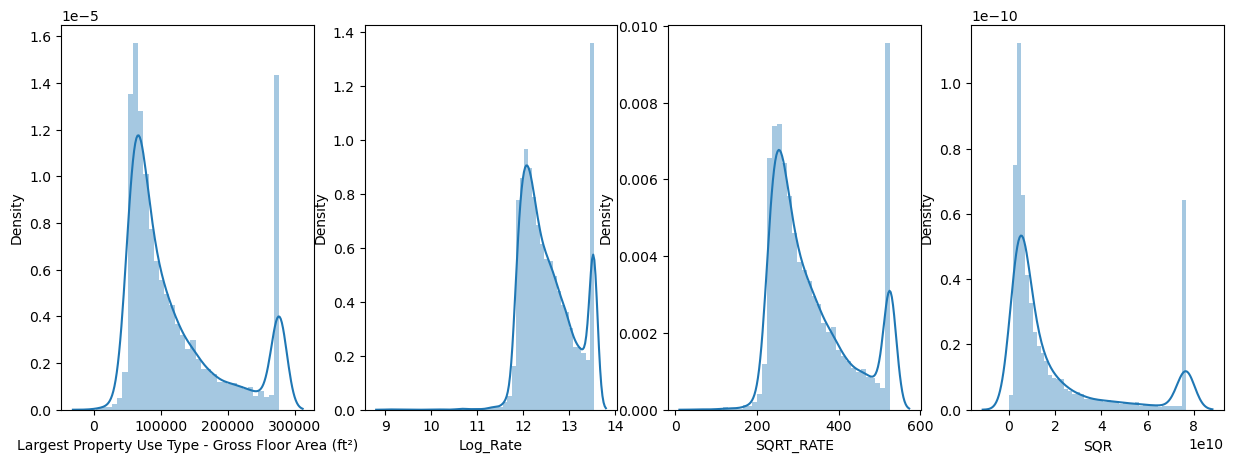

In [185]:
fig, axes = plt.subplots(1,4, figsize=(15,5))
sns.distplot(sd['Largest Property Use Type - Gross Floor Area (ft²)'], ax=axes[0])
sns.distplot(sd['Log_Rate'] , ax=axes[1])
sns.distplot(sd['SQRT_RATE'] , ax=axes[2])
sns.distplot(sd['SQR'] , ax=axes[3])
plt.show()

In [186]:
print("The skewness of the original data is {}".format(sd['Largest Property Use Type - Gross Floor Area (ft²)'].skew()))
print("The skewnss of the SQR data is {}".format(sd['SQR'].skew()))
print('The skewness of the SQRT transformed data is {}'.format(sd.SQRT_RATE.skew()))
print("The skewnss of the LOG transformed data is {}".format(sd['Log_Rate'].skew()))

print('')

print("The kurtosis of the original data is {}".format(sd['Largest Property Use Type - Gross Floor Area (ft²)'].kurt()))
print("The kurtosis of the SQR is {}".format(sd['SQR'].kurt()))
print("The kurtosis of the SQRT transformed data is {}".format(sd.SQRT_RATE.kurt()))
print("The kurtosis of the LOG transformed data is {}".format(sd['Log_Rate'].kurt()))


The skewness of the original data is 1.134276282706973
The skewnss of the SQR data is 1.5719204135243077
The skewness of the SQRT transformed data is 0.8268458327485013
The skewnss of the LOG transformed data is 0.368120715050923

The kurtosis of the original data is -0.005527589885139683
The kurtosis of the SQR is 1.0137503463150317
The kurtosis of the SQRT transformed data is -0.4777822493472761
The kurtosis of the LOG transformed data is -0.24986188139838772


### Inference:

Log Transformation made the rate left skewed and more peaked.

However, Log transformation is more closer to 0 and hence is more normal. Though it heavily maniupulates the data.

In our case, square root transformation is more suitable.

In [187]:
sd['Largest Property Use Type - Gross Floor Area (ft²)'] = sd['Largest Property Use Type - Gross Floor Area (ft²)']**0.5

In [188]:
sd['Log_Rate'] = np.log(sd['Natural Gas Use (kBtu)'])+1
sd['SQRT_RATE'] = sd['Natural Gas Use (kBtu)']**0.5
sd['SQR'] = sd['Natural Gas Use (kBtu)']**2

C:\Users\sathv\anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


C:\Users\sathv\AppData\Local\Temp\ipykernel_9932\1919981614.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sd['Natural Gas Use (kBtu)'], ax=axes[0])
C:\Users\sathv\AppData\Local\Temp\ipykernel_9932\1919981614.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sd['SQRT_RATE'] , ax=axes[1])


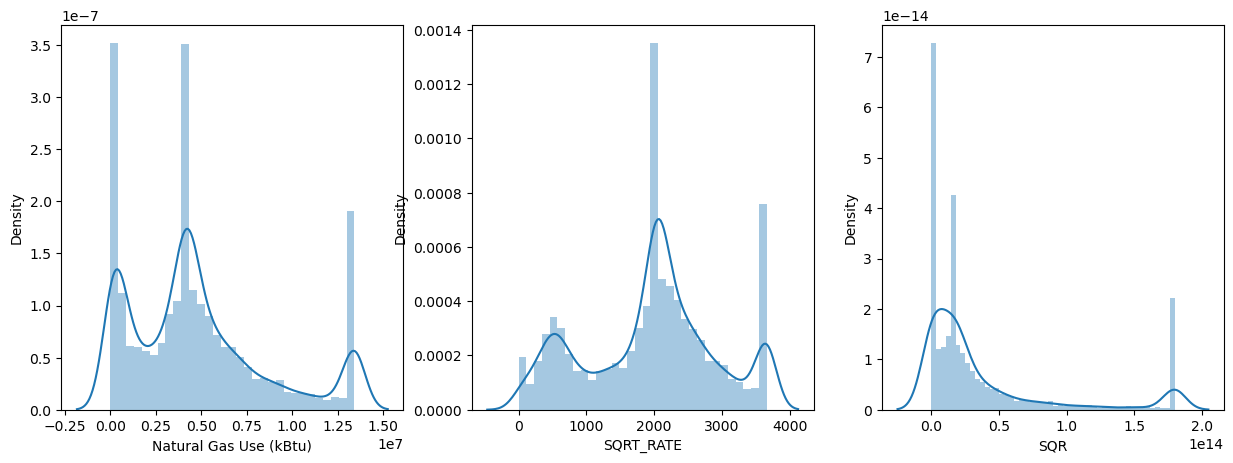

In [189]:
fig, axes = plt.subplots(1,3, figsize=(15,5))
sns.distplot(sd['Natural Gas Use (kBtu)'], ax=axes[0])
sns.distplot(sd['SQRT_RATE'] , ax=axes[1])
sns.distplot(sd['SQR'] , ax=axes[2])
plt.show()

In [190]:
print("The skewness of the original data is {}".format(sd['Natural Gas Use (kBtu)'].skew()))
print("The skewnss of the SQR data is {}".format(sd['SQR'].skew()))
print('The skewness of the SQRT transformed data is {}'.format(sd.SQRT_RATE.skew()))
print("The skewnss of the LOG transformed data is {}".format(sd['Log_Rate'].skew()))

print('')

print("The kurtosis of the original data is {}".format(sd['Natural Gas Use (kBtu)'].kurt()))
print("The kurtosis of the SQR is {}".format(sd['SQR'].kurt()))
print("The kurtosis of the SQRT transformed data is {}".format(sd.SQRT_RATE.kurt()))
print("The kurtosis of the LOG transformed data is {}".format(sd['Log_Rate'].kurt()))


The skewness of the original data is 0.8700677635025071
The skewnss of the SQR data is 1.86818821634973
The skewness of the SQRT transformed data is -0.12519756675934404
The skewnss of the LOG transformed data is nan

The kurtosis of the original data is 0.06644453277264883
The kurtosis of the SQR is 2.3204085470209055
The kurtosis of the SQRT transformed data is -0.6247549493802218
The kurtosis of the LOG transformed data is nan


### Inference:

Square Transformation made the rate right skewed.

In our case, square root transformation is more suitable.

In [191]:
sd['Natural Gas Use (kBtu)'] = sd['Natural Gas Use (kBtu)']**0.5

In [192]:
sd.isna().sum()

Borough                                                       0
Primary Property Type - Self Selected                         0
Largest Property Use Type - Gross Floor Area (ft²)            0
Year Built                                                    0
Number of Buildings - Self-reported                           0
Occupancy                                                     0
Metered Areas (Energy)                                        0
ENERGY STAR Score                                             0
Site EUI (kBtu/ft²)                                           0
Weather Normalized Site EUI (kBtu/ft²)                        0
Weather Normalized Site Electricity Intensity (kWh/ft²)       0
Weather Normalized Site Natural Gas Intensity (therms/ft²)    0
Weather Normalized Source EUI (kBtu/ft²)                      0
Natural Gas Use (kBtu)                                        0
Weather Normalized Site Natural Gas Use (therms)              0
Electricity Use - Grid Purchase (kBtu)  

In [193]:
sd['Weather Normalized Site Natural Gas Use (therms)'] = sd['Weather Normalized Site Natural Gas Use (therms)']**0.5
sd['Electricity Use - Grid Purchase (kBtu)'] = sd['Electricity Use - Grid Purchase (kBtu)']**0.5
sd['Weather Normalized Site Electricity (kWh)'] = sd['Weather Normalized Site Electricity (kWh)']**0.5
sd['Indirect GHG Emissions (Metric Tons CO2e)'] = sd['Indirect GHG Emissions (Metric Tons CO2e)']**0.5


In [194]:
sd['Indirect GHG Emissions (Metric Tons CO2e)']=sd['Indirect GHG Emissions (Metric Tons CO2e)'].astype(float)
sd['Indirect GHG Emissions (Metric Tons CO2e)']=sd['Indirect GHG Emissions (Metric Tons CO2e)'].fillna(sd['Weather Normalized Site EUI (kBtu/ft²)'].median())


In [195]:
#droping dummy column create to test
sd.drop(columns=['release_year','Release Date','Log_Rate','SQRT_RATE','SQR','Year Built'],inplace=True)

In [196]:
sd.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9642 entries, 1 to 11745
Data columns (total 26 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Borough                                                     9642 non-null   int32  
 1   Primary Property Type - Self Selected                       9642 non-null   int64  
 2   Largest Property Use Type - Gross Floor Area (ft²)          9642 non-null   float64
 3   Number of Buildings - Self-reported                         9642 non-null   int64  
 4   Occupancy                                                   9642 non-null   int64  
 5   Metered Areas (Energy)                                      9642 non-null   int32  
 6   ENERGY STAR Score                                           9642 non-null   float64
 7   Site EUI (kBtu/ft²)                                         9642 non-null   float64
 8   We

In [197]:
#split target and independent feature for training
X=sd.drop(columns='ENERGY STAR Score')
y=sd['ENERGY STAR Score']

In [198]:
# Feature scaling 

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Lets train the model using train test split

In [199]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, train_size=0.7 , random_state=100)

In [200]:
y_train

5120     53.0
4077     85.0
11495    87.0
5332     81.0
9004     69.0
         ... 
563      44.0
185      34.0
9886     92.0
8623     53.0
7090     53.0
Name: ENERGY STAR Score, Length: 6749, dtype: float64

In [201]:
X_train[:5]

array([[-0.96354766, -0.31140117, -0.09428282, -0.07187433,  0.17346369,
        -0.04076966,  0.32629052, -0.04398911, -0.37269824, -1.16073556,
        -0.14335741, -0.89903237, -0.96223164, -0.28387248, -0.28516443,
         0.08105383,  0.89776302, -0.29620265, -0.06890435,  1.11804149,
         0.43758518,  1.38562964, -0.46757837, -0.32190091,  0.94662255],
       [-0.96354766, -0.31140117, -0.02446557, -0.07187433,  0.17346369,
        -0.04076966, -0.52210018, -0.54567397, -0.67322355,  0.03961969,
        -0.75585021,  0.31789503,  0.35968011, -0.47094529, -0.48001275,
        -0.49138003, -0.10935222, -0.46982738, -0.70112372,  0.29990822,
        -0.10735449,  0.30712539, -0.66591213, -0.33030545,  0.34777939],
       [ 0.72563898,  2.91365795, -1.13794108, -0.07187433,  0.17346369,
        -0.04076966, -0.43177722, -0.34920997, -1.59984326,  0.03961969,
        -1.20939159, -0.22793649, -0.15015386, -1.82452678, -1.87366833,
        -1.06034336, -0.69818976, -1.72554313, -1

### Lets use Linear Regression model and find best fit line for given dataset

In [202]:
lm = LinearRegression()

In [203]:
lm.fit(X_train,y_train)

LinearRegression()

In [204]:
print(lm.intercept_)
print(lm.coef_)

59.77891180517423
[  1.84240639   0.14269137   3.74073445  -0.56777416   0.24094859
  -0.12026545 -19.43660486   4.29604883   3.29576103  -1.48118123
  -7.06167239  -1.92378297   2.51234366   1.34457309  -3.86260256
   8.84792971  -4.1762294   -9.64261284  -1.07313249  -0.59891265
  -2.64082267   1.80917488  -1.17641096  -0.17956212   2.7764023 ]


## Model evalution

In [205]:
y_pred = lm.predict(X_test)

In [206]:
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)
print('MAE:',metrics.mean_absolute_error(y_test, y_pred))
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

MAE: 14.48323775213221
Mean_Squared_Error : 346.64006494995357
r_square_value : 0.6195978695612777


#### Inference: Above results show that mean absolute error is close to 14.5 and R-square is 62% i.e our model predicts 62% correct result

Text(0, 0.5, 'ENERGY STAR Score')

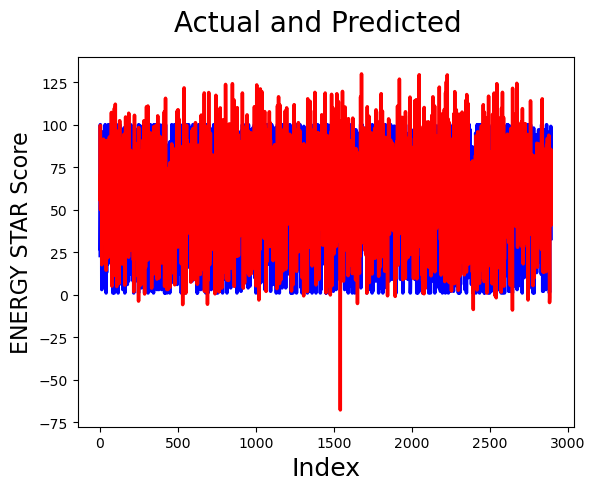

In [207]:
c = [i for i in range(1,2894,1)] # generating index 
fig = plt.figure() 
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-") #Plotting Actual
plt.plot(c,y_pred, color="red",  linewidth=2.5, linestyle="-") #Plotting predicted
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('ENERGY STAR Score', fontsize=16)      

### above daigram shows prediction is almost close

Text(0, 0.5, 'y_pred')

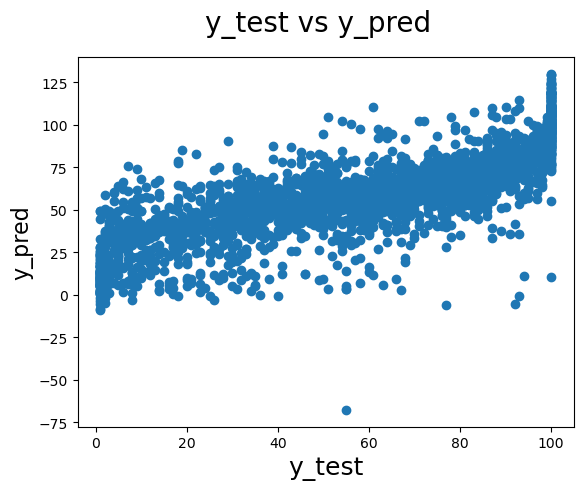

In [208]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)  

C:\Users\sathv\AppData\Local\Temp\ipykernel_9932\3209440826.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test-y_pred),bins=50)


Text(0, 0.5, 'Index')

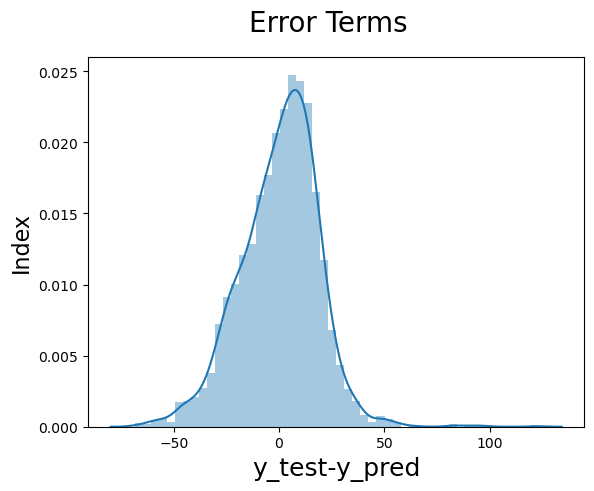

In [209]:
# Plotting the error terms to understand the distribution.
fig = plt.figure()
sns.distplot((y_test-y_pred),bins=50)
fig.suptitle('Error Terms', fontsize=20)                  # Plot heading 
plt.xlabel('y_test-y_pred', fontsize=18)                  # X-label
plt.ylabel('Index', fontsize=16) 

### Error loss is normal distrubuted

## Lets train our model with L2 and L1 Model

In [210]:
# Ridge Regression L2
ridge_model = Ridge(alpha=1)
ridge_model.fit(X_train, y_train)
ridge_pred = ridge_model.predict(X_test)
ridge_mse = mean_squared_error(y_test, ridge_pred)
ridge_mae = metrics.mean_absolute_error(y_test, y_pred)
# Lasso Regression L1
lasso_model = Lasso(alpha=1)
lasso_model.fit(X_train, y_train)
lasso_pred = lasso_model.predict(X_test)
lasso_mse = mean_squared_error(y_test, lasso_pred)
lasso_mae = metrics.mean_absolute_error(y_test, y_pred)

ridge_mse, lasso_mse


(346.5928423249409, 361.5085000750009)

In [211]:
ridge_mae, lasso_mae

(14.48323775213221, 14.48323775213221)

### Mean absolute error is almost similar to Linear regression model

In [212]:
X_train = sm.add_constant(X_train)    
lm_1 = sm.OLS(y_train,X_train).fit()
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:      ENERGY STAR Score   R-squared:                       0.607
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                     416.0
Date:                Sun, 16 Jun 2024   Prob (F-statistic):               0.00
Time:                        13:45:03   Log-Likelihood:                -29354.
No. Observations:                6749   AIC:                         5.876e+04
Df Residuals:                    6723   BIC:                         5.894e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         59.7789      0.229    261.409      0.0

### Lets try using Cross validation technique

In [213]:
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
scores = cross_val_score(lm, X_train, y_train, scoring='neg_mean_absolute_error', cv=folds)
np.mean(-scores)

14.659645369983991

#### Above avg score also gives same result as before model result.

### A common use of cross-validation is for tuning hyperparameters of a model. The most common technique is what is called grid search cross-validation

In [214]:
# number of features in X_train
X_train.shape

(6749, 26)

In [215]:
# step-1: create a cross-validation scheme
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

# step-2: specify range of hyperparameters to tune
hyper_params = [{'n_features_to_select': list(range(1, 24))}]


# step-3: perform grid search
# 3.1 specify model
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm)             

# 3.2 call GridSearchCV()
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train) 

GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             estimator=RFE(estimator=LinearRegression()),
             param_grid=[{'n_features_to_select': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11, 12, 13, 14, 15, 16,
                                                   17, 18, 19, 20, 21, 22,
                                                   23]}],
             return_train_score=True, scoring='neg_mean_absolute_error')

In [216]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.089109,0.012845,0.000997,0.000003,1,{'n_features_to_select': 1},-15.335414,-15.769608,-15.892634,-15.807901,-15.571215,-15.675354,0.200034,23,-15.738660,-15.654337,-15.624472,-15.649738,-15.691816,-15.671805,0.039755
1,0.093748,0.016994,0.001199,0.000398,2,{'n_features_to_select': 2},-15.091131,-15.544082,-15.677514,-15.586830,-15.422328,-15.464377,0.203890,22,-15.530802,-15.444306,-15.415524,-15.443910,-15.463856,-15.459680,0.038757
2,0.088171,0.012951,0.001001,0.000009,3,{'n_features_to_select': 3},-14.696508,-15.295553,-15.356422,-15.203778,-15.098871,-15.130227,0.233667,21,-15.211806,-15.090164,-15.079997,-15.115897,-15.128306,-15.125234,0.046621
3,0.073086,0.008362,0.001071,0.000139,4,{'n_features_to_select': 4},-14.606338,-15.127716,-15.406432,-15.254007,-15.123316,-15.103562,0.269284,20,-15.087503,-14.990129,-14.923096,-15.114265,-15.133490,-15.049697,0.080244
4,0.076340,0.008695,0.001236,0.000438,5,{'n_features_to_select': 5},-14.580241,-15.071580,-15.346474,-15.078588,-15.154312,-15.046239,0.253244,19,-15.055100,-14.970345,-14.899255,-14.985570,-15.140120,-15.010078,0.081730
5,0.080030,0.011554,0.001255,0.000205,6,{'n_features_to_select': 6},-14.572114,-15.100815,-15.345583,-15.047714,-14.940870,-15.001419,0.252365,18,-15.056785,-14.967218,-14.904844,-14.993784,-14.988865,-14.982299,0.048887
6,0.069314,0.014536,0.001002,0.000011,7,{'n_features_to_select': 7},-14.416848,-14.941816,-15.349790,-15.058776,-14.943054,-14.942057,0.301899,17,-14.861669,-14.769360,-14.896028,-14.984259,-14.982146,-14.898692,0.080487
7,0.068388,0.008822,0.000852,0.000429,8,{'n_features_to_select': 8},-14.414247,-14.909338,-15.342911,-15.077441,-14.926523,-14.934092,0.302850,15,-14.836004,-14.755505,-14.899413,-14.989286,-14.986984,-14.893438,0.089775
8,0.064155,0.002736,0.000589,0.000481,9,{'n_features_to_select': 9},-14.429606,-14.950875,-15.314398,-15.052400,-14.937710,-14.936998,0.287537,16,-14.836312,-14.753974,-14.889811,-14.973630,-14.964250,-14.883595,0.082082
9,0.068013,0.012962,0.000996,0.000052,10,{'n_features_to_select': 10},-14.407681,-14.946007,-15.081196,-14.812793,-14.702918,-14.790119,0.229523,14,-14.827682,-14.739656,-14.707200,-14.783742,-14.768740,-14.765404,0.040686


#### from above result n_features_to_select=10 gives best score

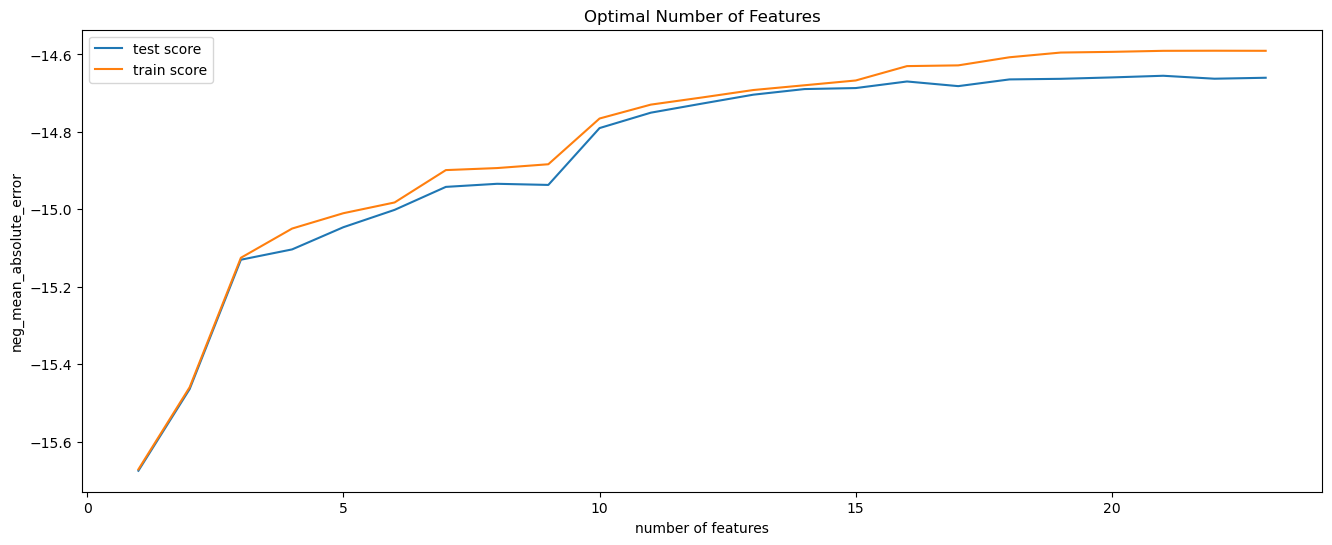

In [217]:
# plotting cv results
plt.figure(figsize=(16,6))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('neg_mean_absolute_error')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')

### The end..